# Libraries

In [1]:
import pandas as pd
from matplotlib import rcParams, pyplot as plt
from tqdm import tqdm
import os

def plot_params():
    params = {
       'font.family' : 'sans-serif',
       'font.sans-serif' : 'Calibri',
       'axes.labelsize': 24,
       'axes.labelweight': "bold",
       'axes.titlesize': 24,
       'axes.titleweight': "bold",
       'font.size': 24,
       'font.weight': "bold",
       'legend.fontsize': 24,
       'xtick.labelsize': 24,
       'ytick.labelsize': 24,
       'text.usetex': False,
       'figure.figsize': [6*1.5, 3.7082*1.5]
       }
    rcParams.update(params)
    
plot_params()

# Loading Data

In [2]:
filenames = ['I-25.xlsx', 'I-40.xlsx', 'I-10.xlsx']
df_lists = []
for i, filename in enumerate(filenames):
    xlsx = pd.ExcelFile(filename)
    df_list = []
    if i%2 == 0: xlsx_sheets = xlsx.sheet_names[:-2]
    else: xlsx_sheets = xlsx.sheet_names[:-1]
    for sheet_name in xlsx_sheets:
        df_list.append(pd.read_excel(xlsx, sheet_name))
    df_lists.append(df_list)

# Initializations

In [3]:
# Season-wise temperature limits
spring = [18, 86]
summer = [32, 122]
autumn = [10, 90]
winter = [-50, 66]

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

data_types = ['Avg_SN', 'Min_SN', 'Max_SN', 'Peak']

# Seasonal sorting

In [4]:
data_dict_list = []

for df_list in df_lists:

    data_dict = dict()

    for season in seasons:
        data_dict[season] = {}
        for data_type in data_types:
            data_dict[season][data_type] = []

    for df in tqdm(df_list):
        temp_column_names = ['Temp', 'Air Temp (Fahrenheit)', 'Air Temp (F)']
        for temp_column_name in temp_column_names: 
            if temp_column_name in df.columns: break
        peak_column_names = ['Peak', 'Left\n SN']
        for peak_column_name in peak_column_names: 
            if peak_column_name in df.columns: break
        for row in range(df.shape[0]):
            if pd.isnull(df.at[row, temp_column_name]): continue
            else: temp = df.at[row, temp_column_name]
            chosen_season = [0, 0, 0, 0]
            if temp >= spring[0] and temp <= spring[1]: chosen_season[0] = 1
            if temp >= summer[0] and temp <= summer[1]: chosen_season[1] = 1
            if temp >= autumn[0] and temp <= autumn[1]: chosen_season[2] = 1
            if temp >= winter[0] and temp <= winter[1]: chosen_season[3] = 1
            if sum(chosen_season) != 0:
                for season_idx, season_match in enumerate(chosen_season):
                    if season_match:
                        for data_type in data_types:
                            if data_type == 'Peak': 
                                data_dict[seasons[season_idx]][data_type].append(df.at[row, peak_column_name])
                            else:
                                data_dict[seasons[season_idx]][data_type].append(df.at[row, data_type])
            
    data_dict_list.append(data_dict)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 180.70it/s]


# Plots

In [5]:
root_path = 'plots/'
plot_types = ['scatter plots', 'box plots']
for filename in filenames:
    for plot_type in plot_types:
        plot_path = root_path + filename[:-5] + '/' + plot_type + '/'
        isExist = os.path.exists(plot_path)
        if not isExist: os.makedirs(plot_path)

## Scatter Plots

Generating scatter plots plots for I-25.xlsx ...
Generating scatter plots plots for I-25.xlsx : complete.
Generating scatter plots plots for I-40.xlsx ...
Generating scatter plots plots for I-40.xlsx : complete.
Generating scatter plots plots for I-10.xlsx ...
Generating scatter plots plots for I-10.xlsx : complete.


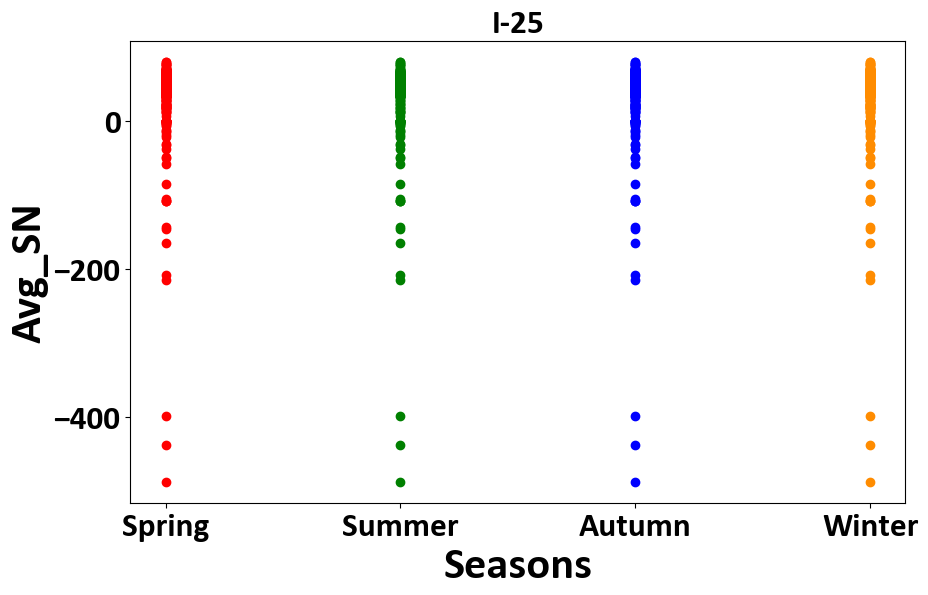

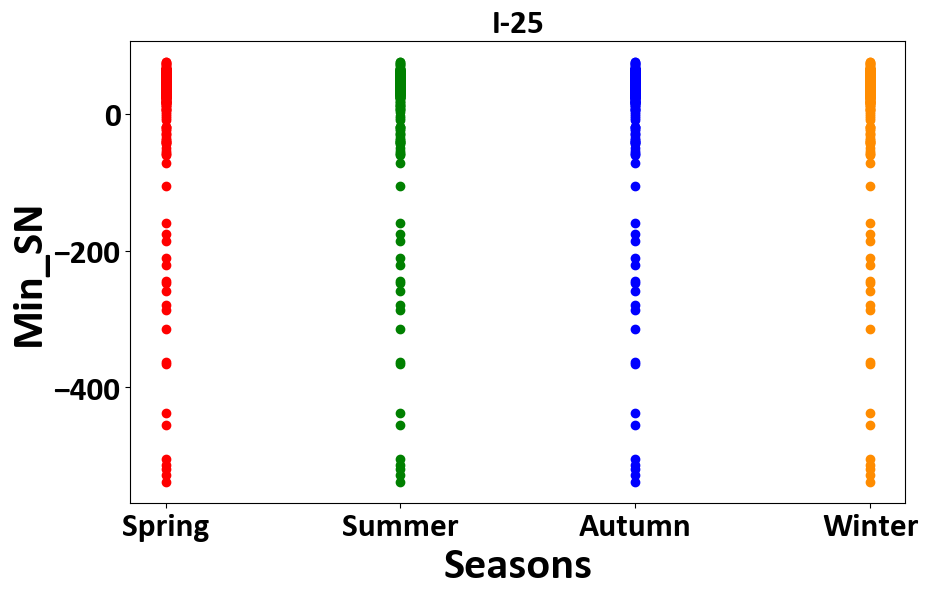

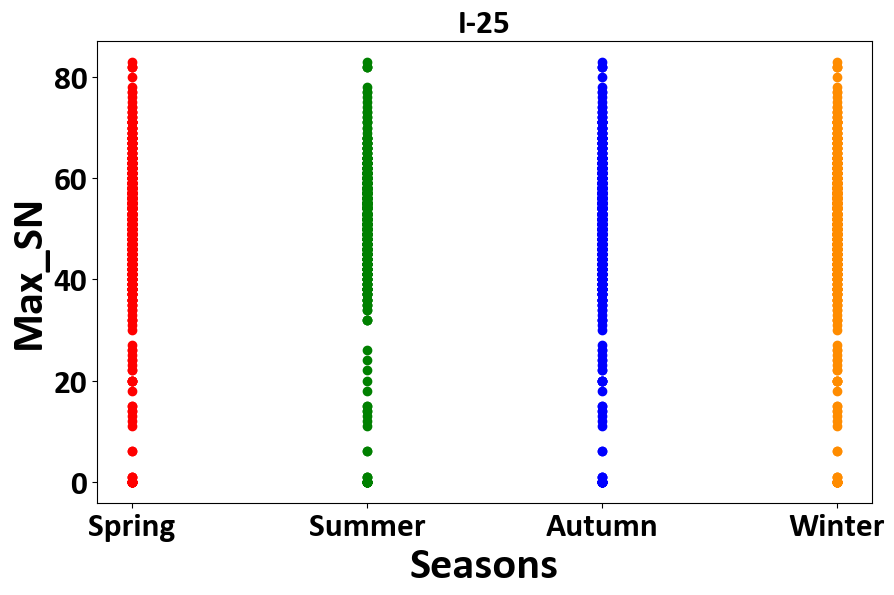

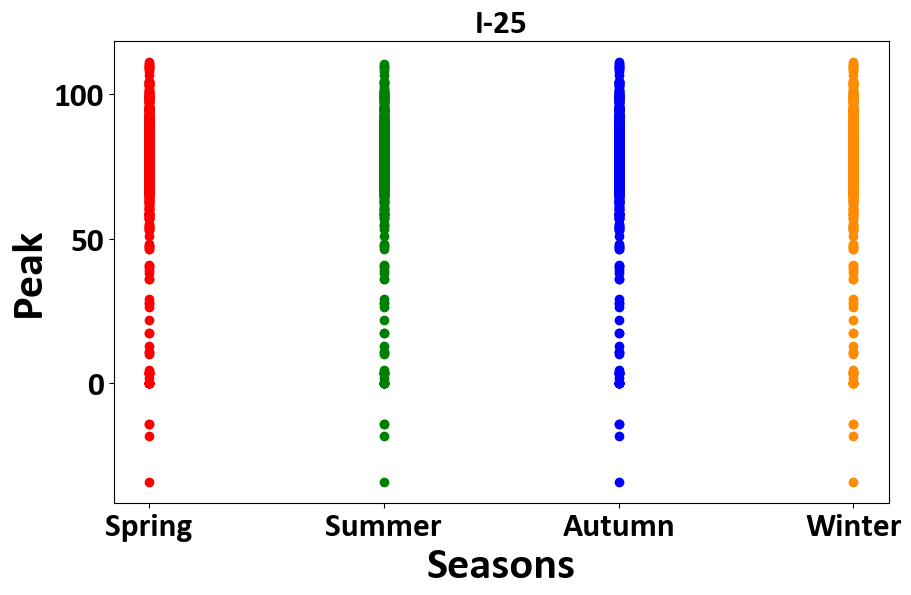

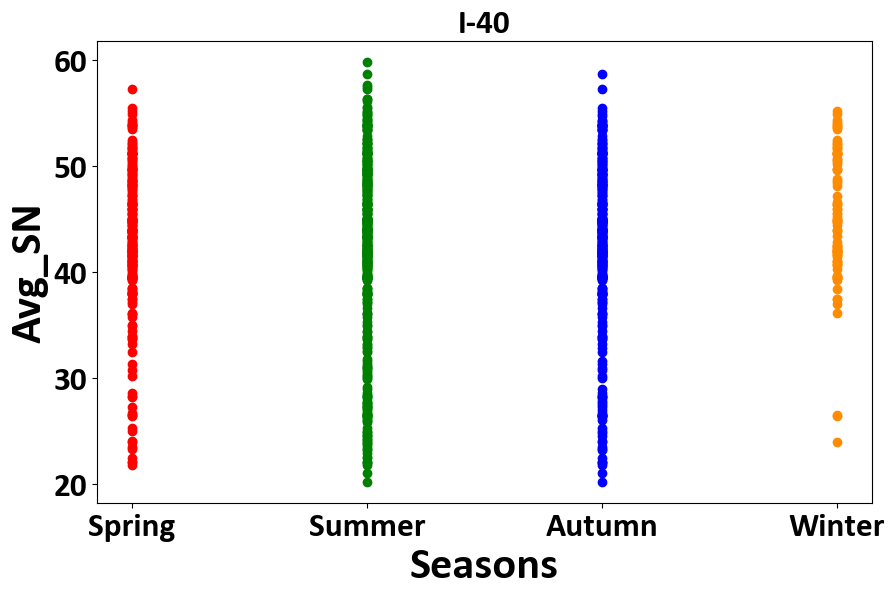

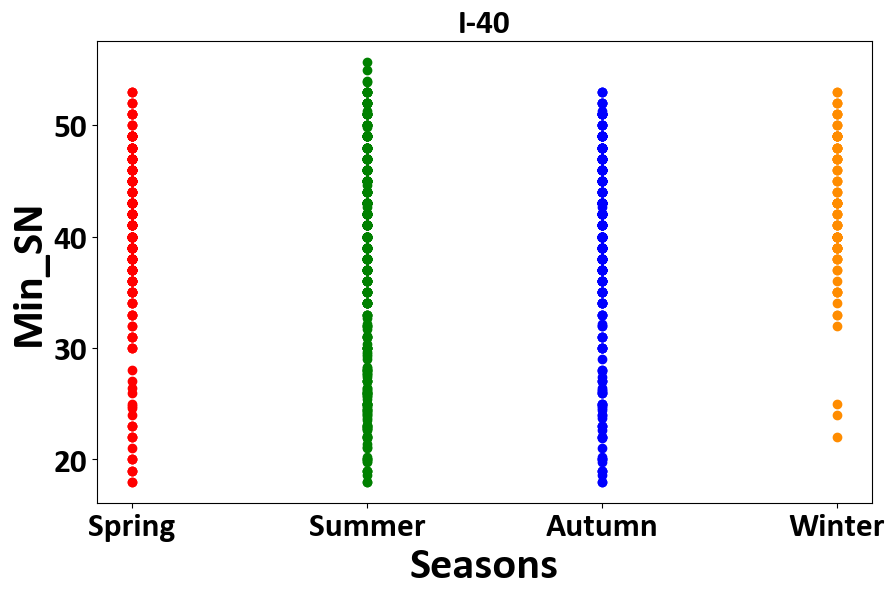

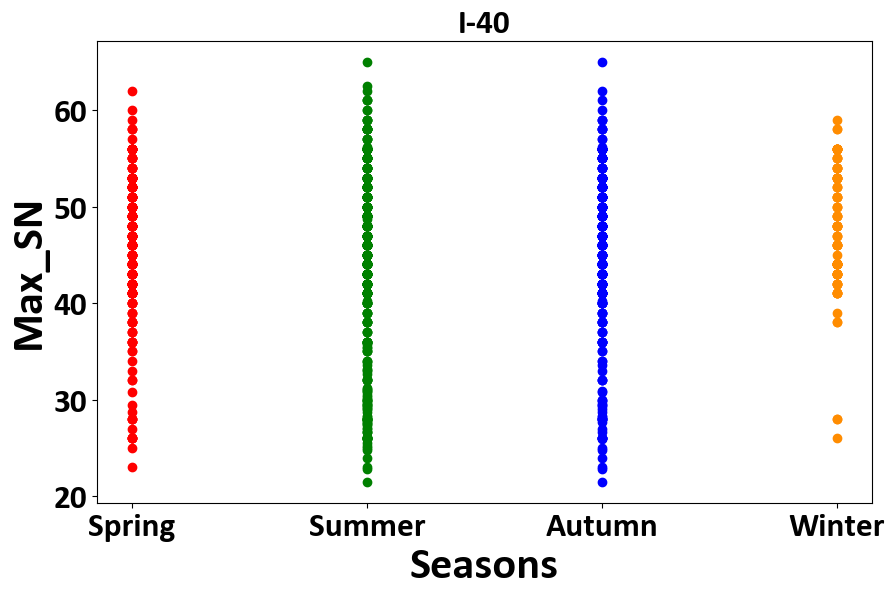

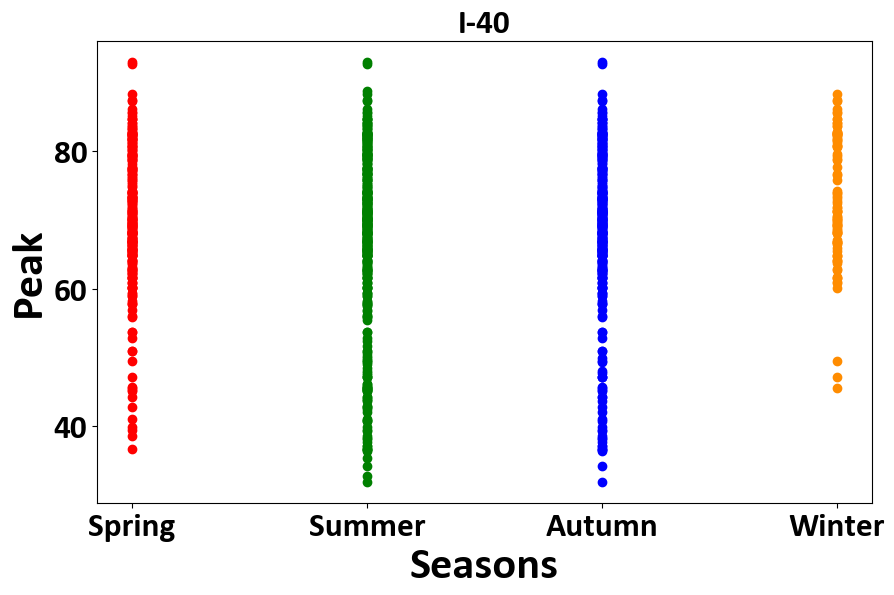

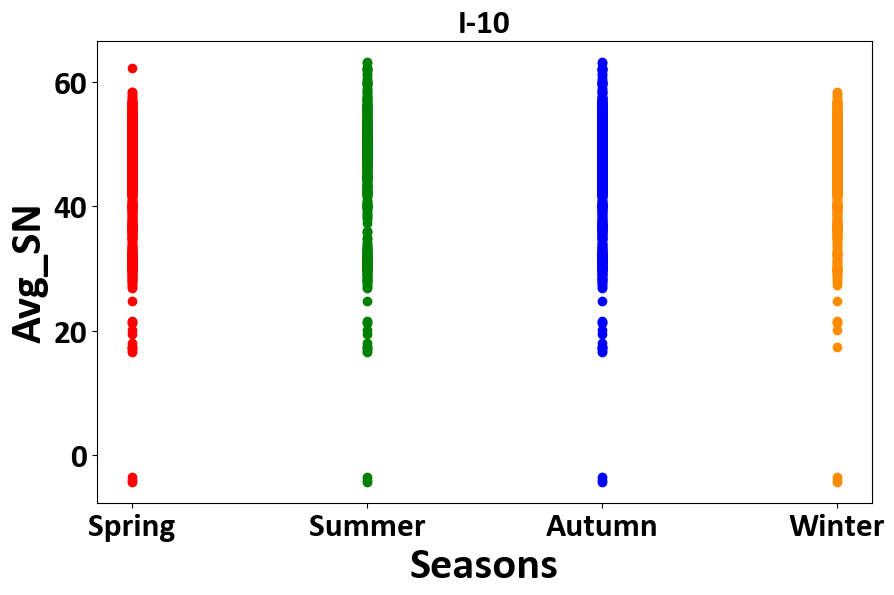

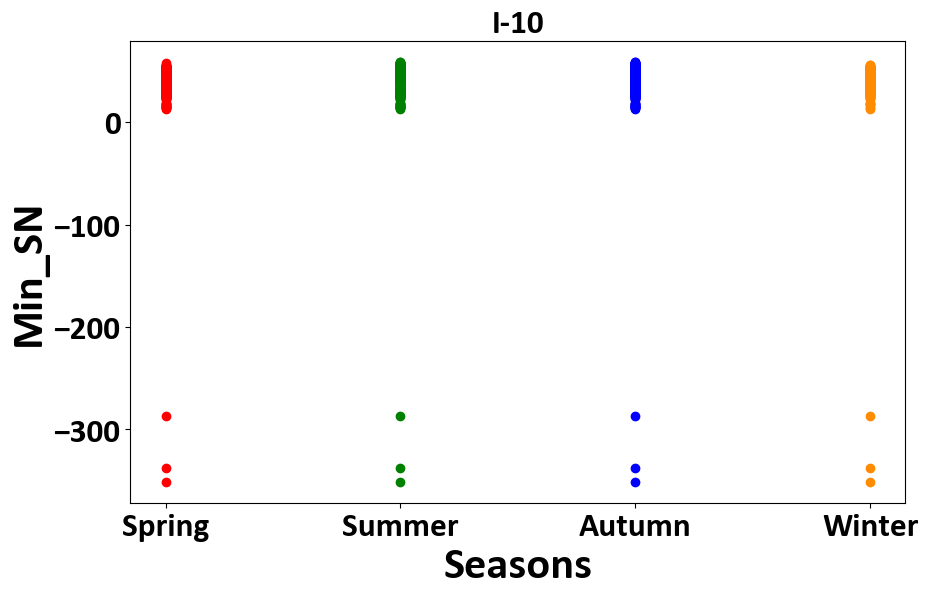

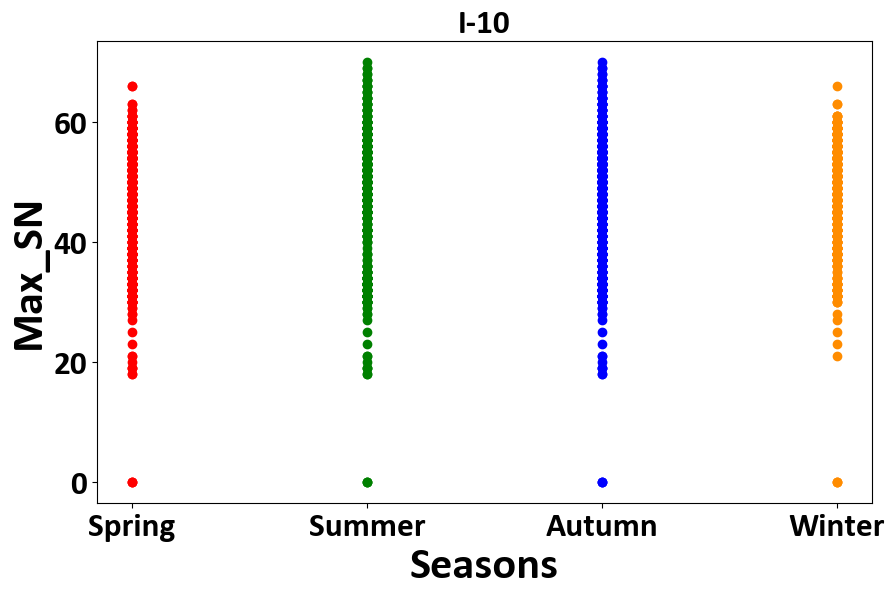

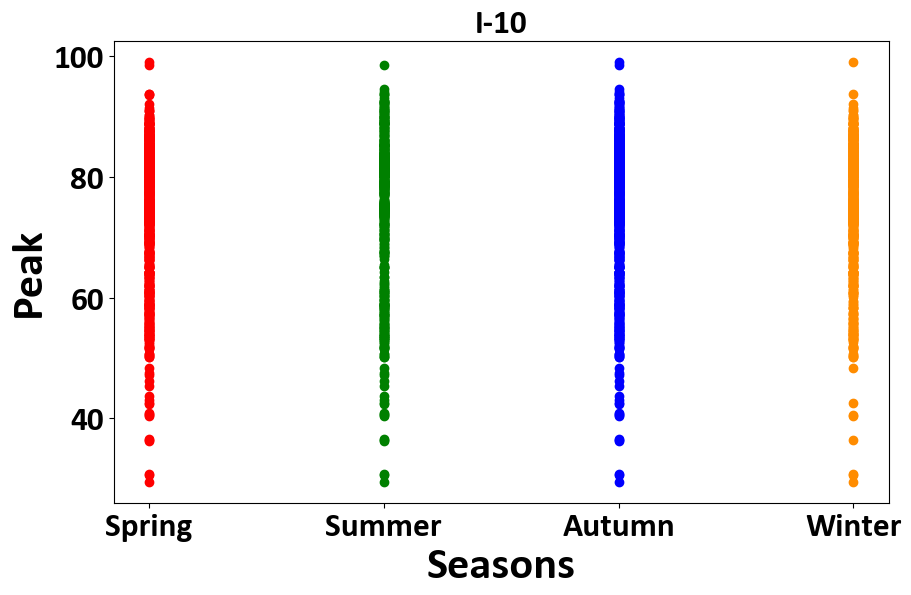

In [6]:
plot_type = 'scatter plots'
for idx, filename in enumerate(filenames):
    print('Generating', plot_type, 'plots for', filename, '...')
    data_dict = data_dict_list[idx]
    for data_type in data_types:
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['red', 'green', 'blue', 'darkorange']
        for season_number, season in enumerate(seasons):
            for i in range(len(data_dict[season][data_type])):
                ax.scatter(season, data_dict[season][data_type][i], color = colors[season_number])
        ax.set_xlabel('Seasons', fontsize = 32)
        ax.set_ylabel(str(data_type), fontsize = 32)
        ax.set_title(filename[:-5], loc='center', pad=None)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.png', format='png', bbox_inches='tight', dpi=720)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.eps', format='eps', bbox_inches='tight', dpi=720)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.pdf', format='pdf', bbox_inches='tight', dpi=720)
    print('Generating', plot_type, 'plots for', filename, ': complete.')

## Box Plots

Generating box plots plots for I-25.xlsx ...
Generating box plots plots for I-25.xlsx : complete.
Generating box plots plots for I-40.xlsx ...
Generating box plots plots for I-40.xlsx : complete.
Generating box plots plots for I-10.xlsx ...
Generating box plots plots for I-10.xlsx : complete.


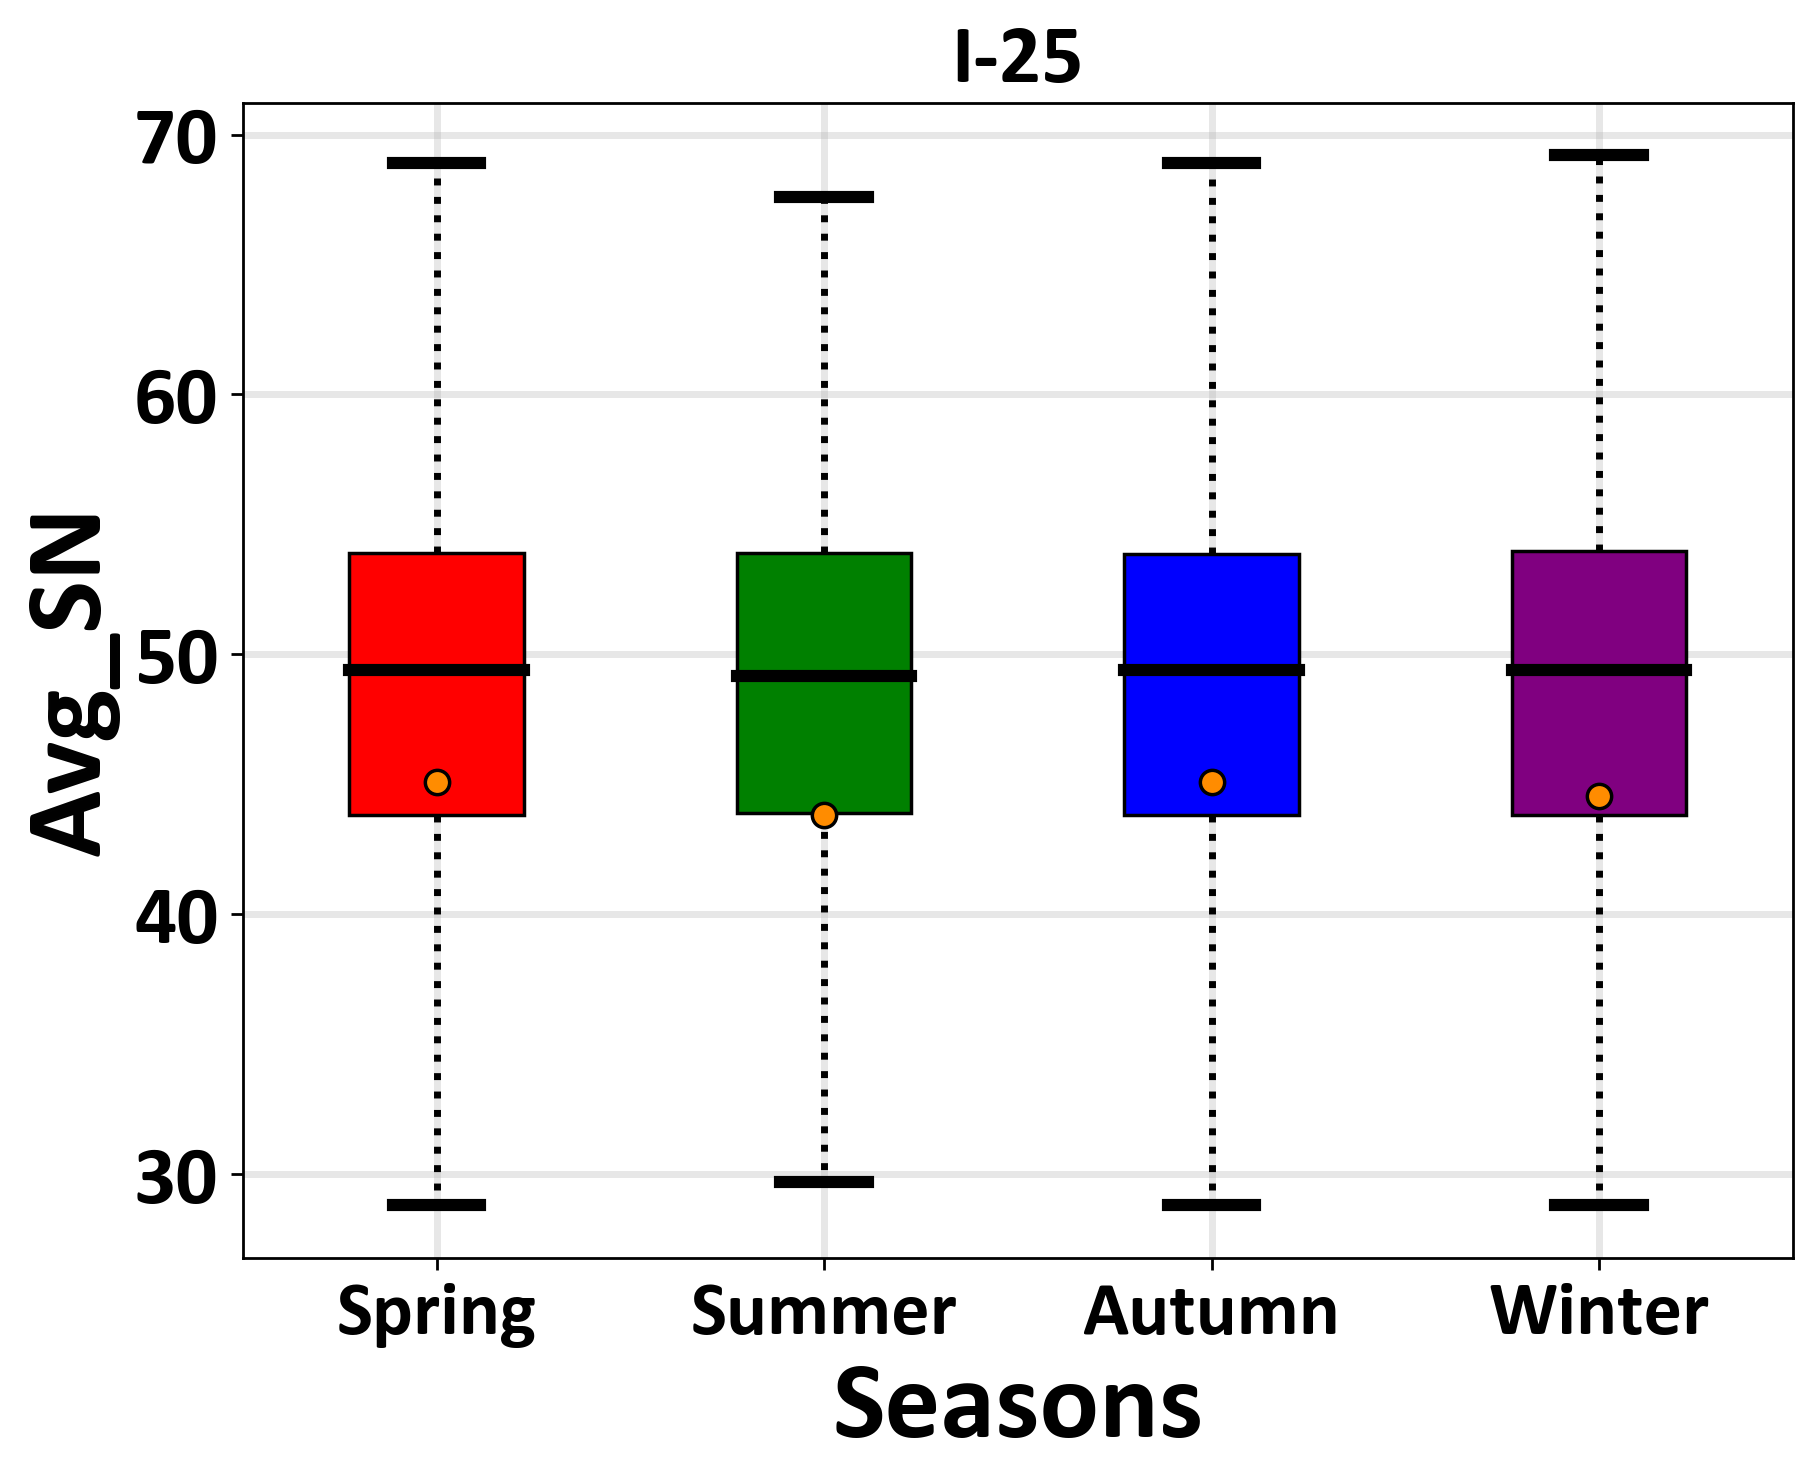

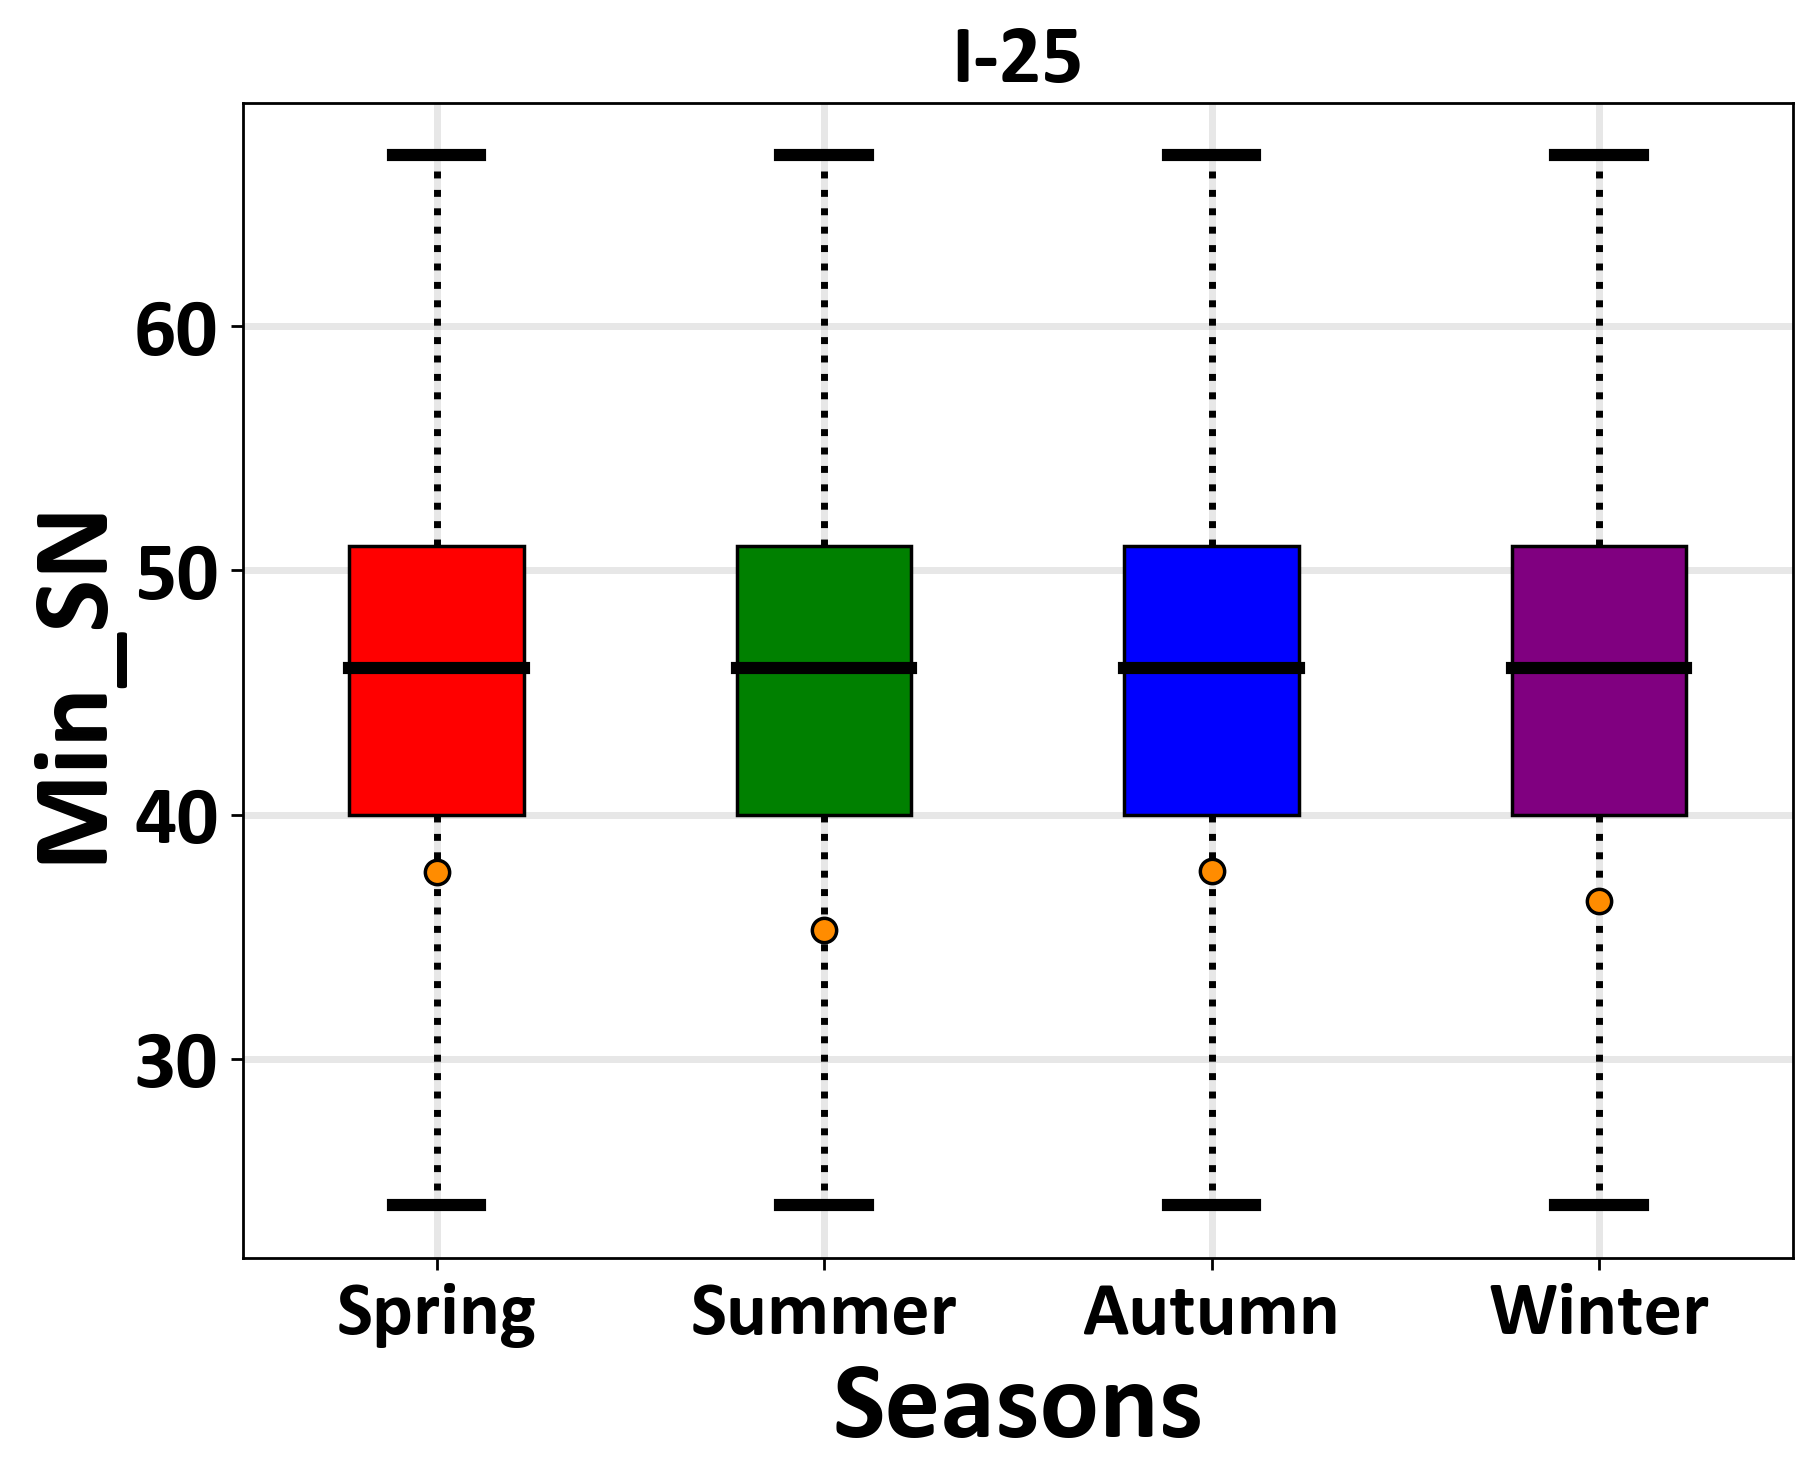

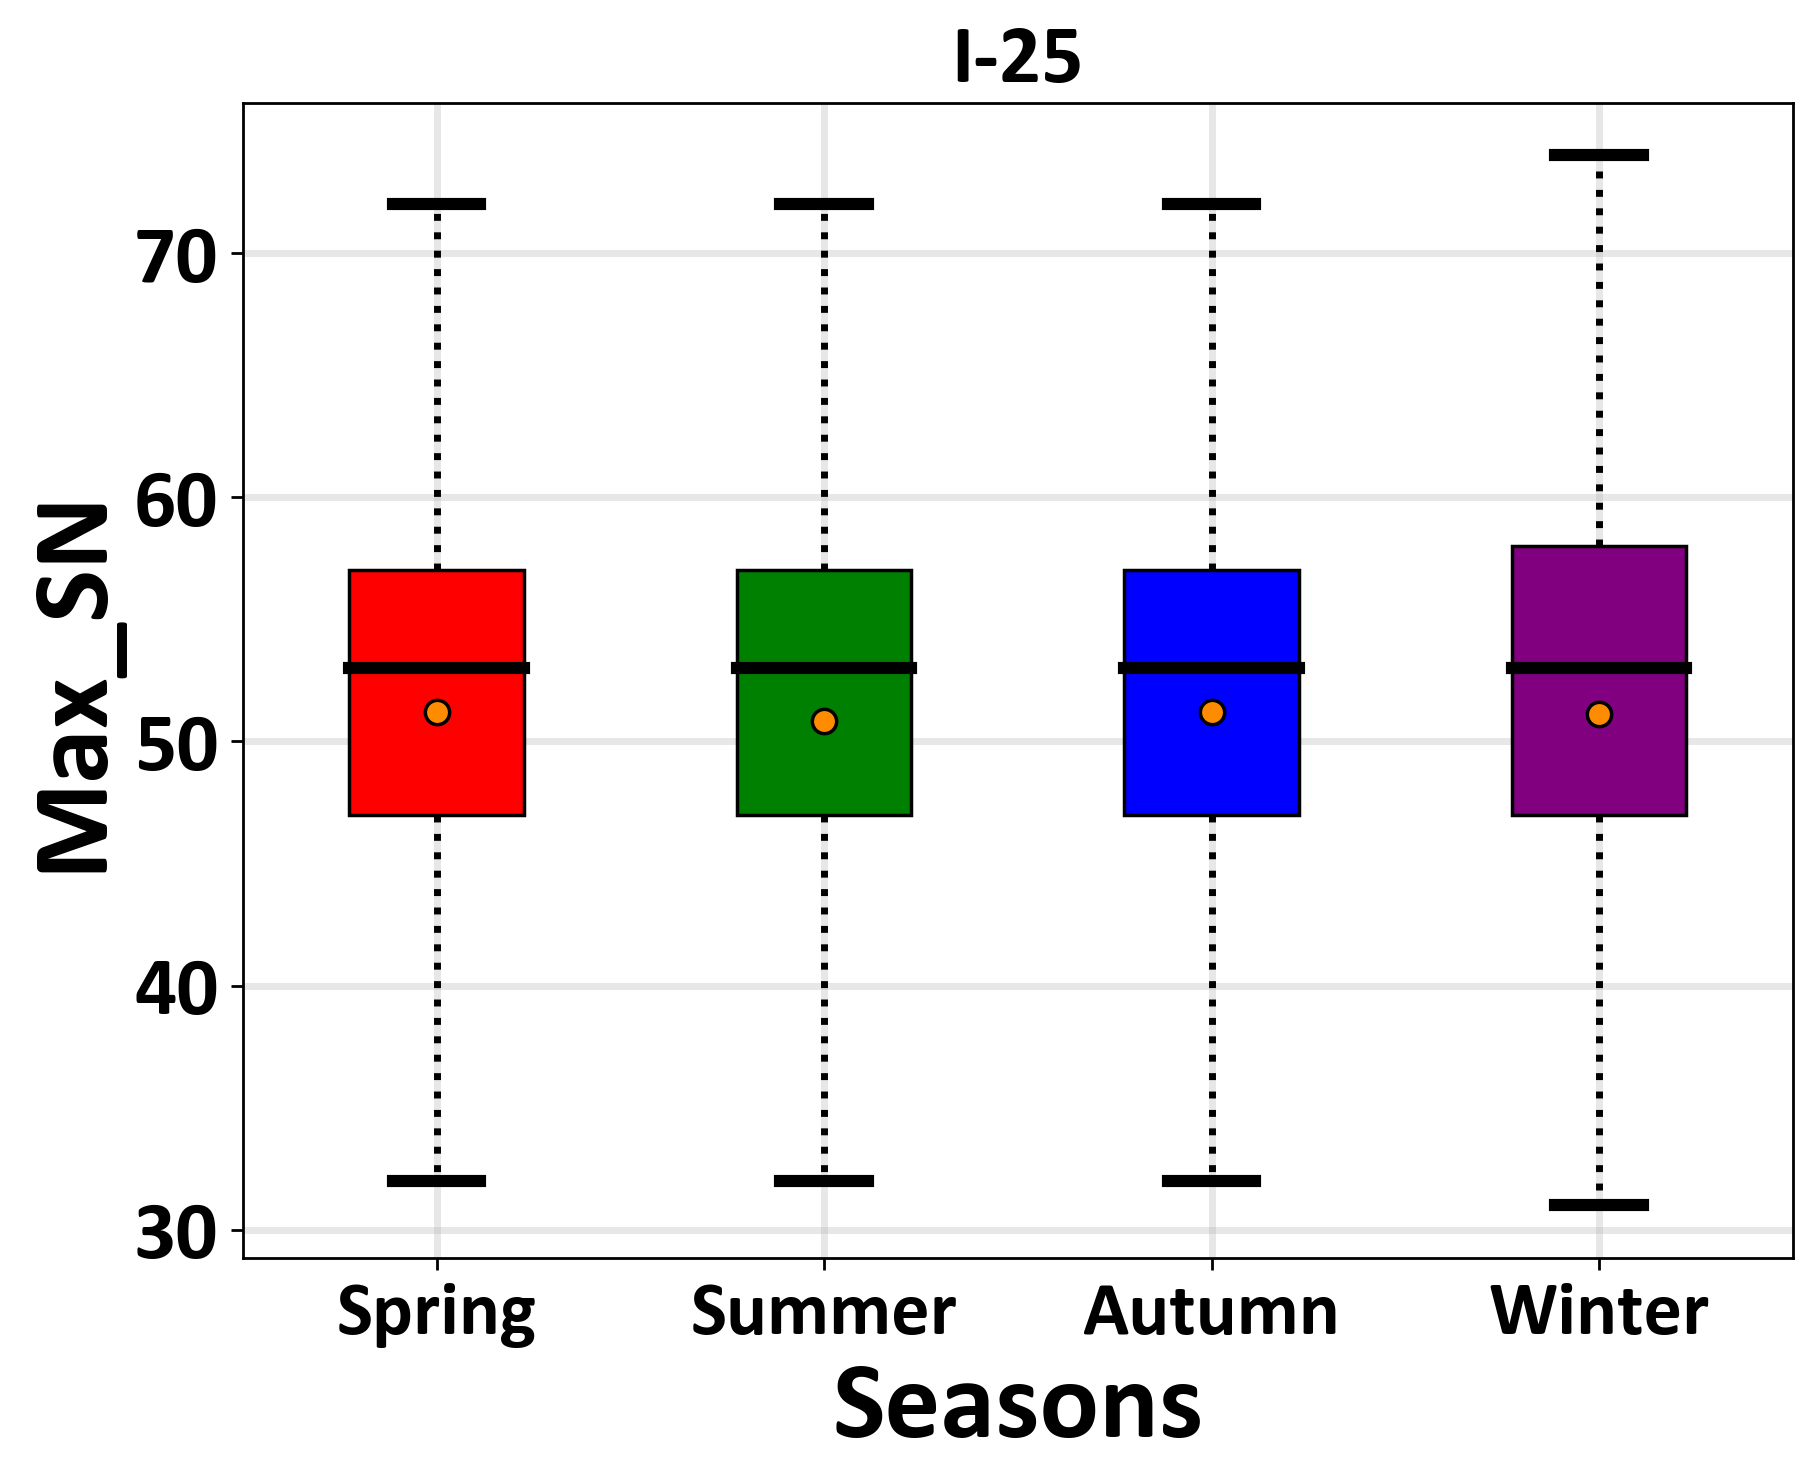

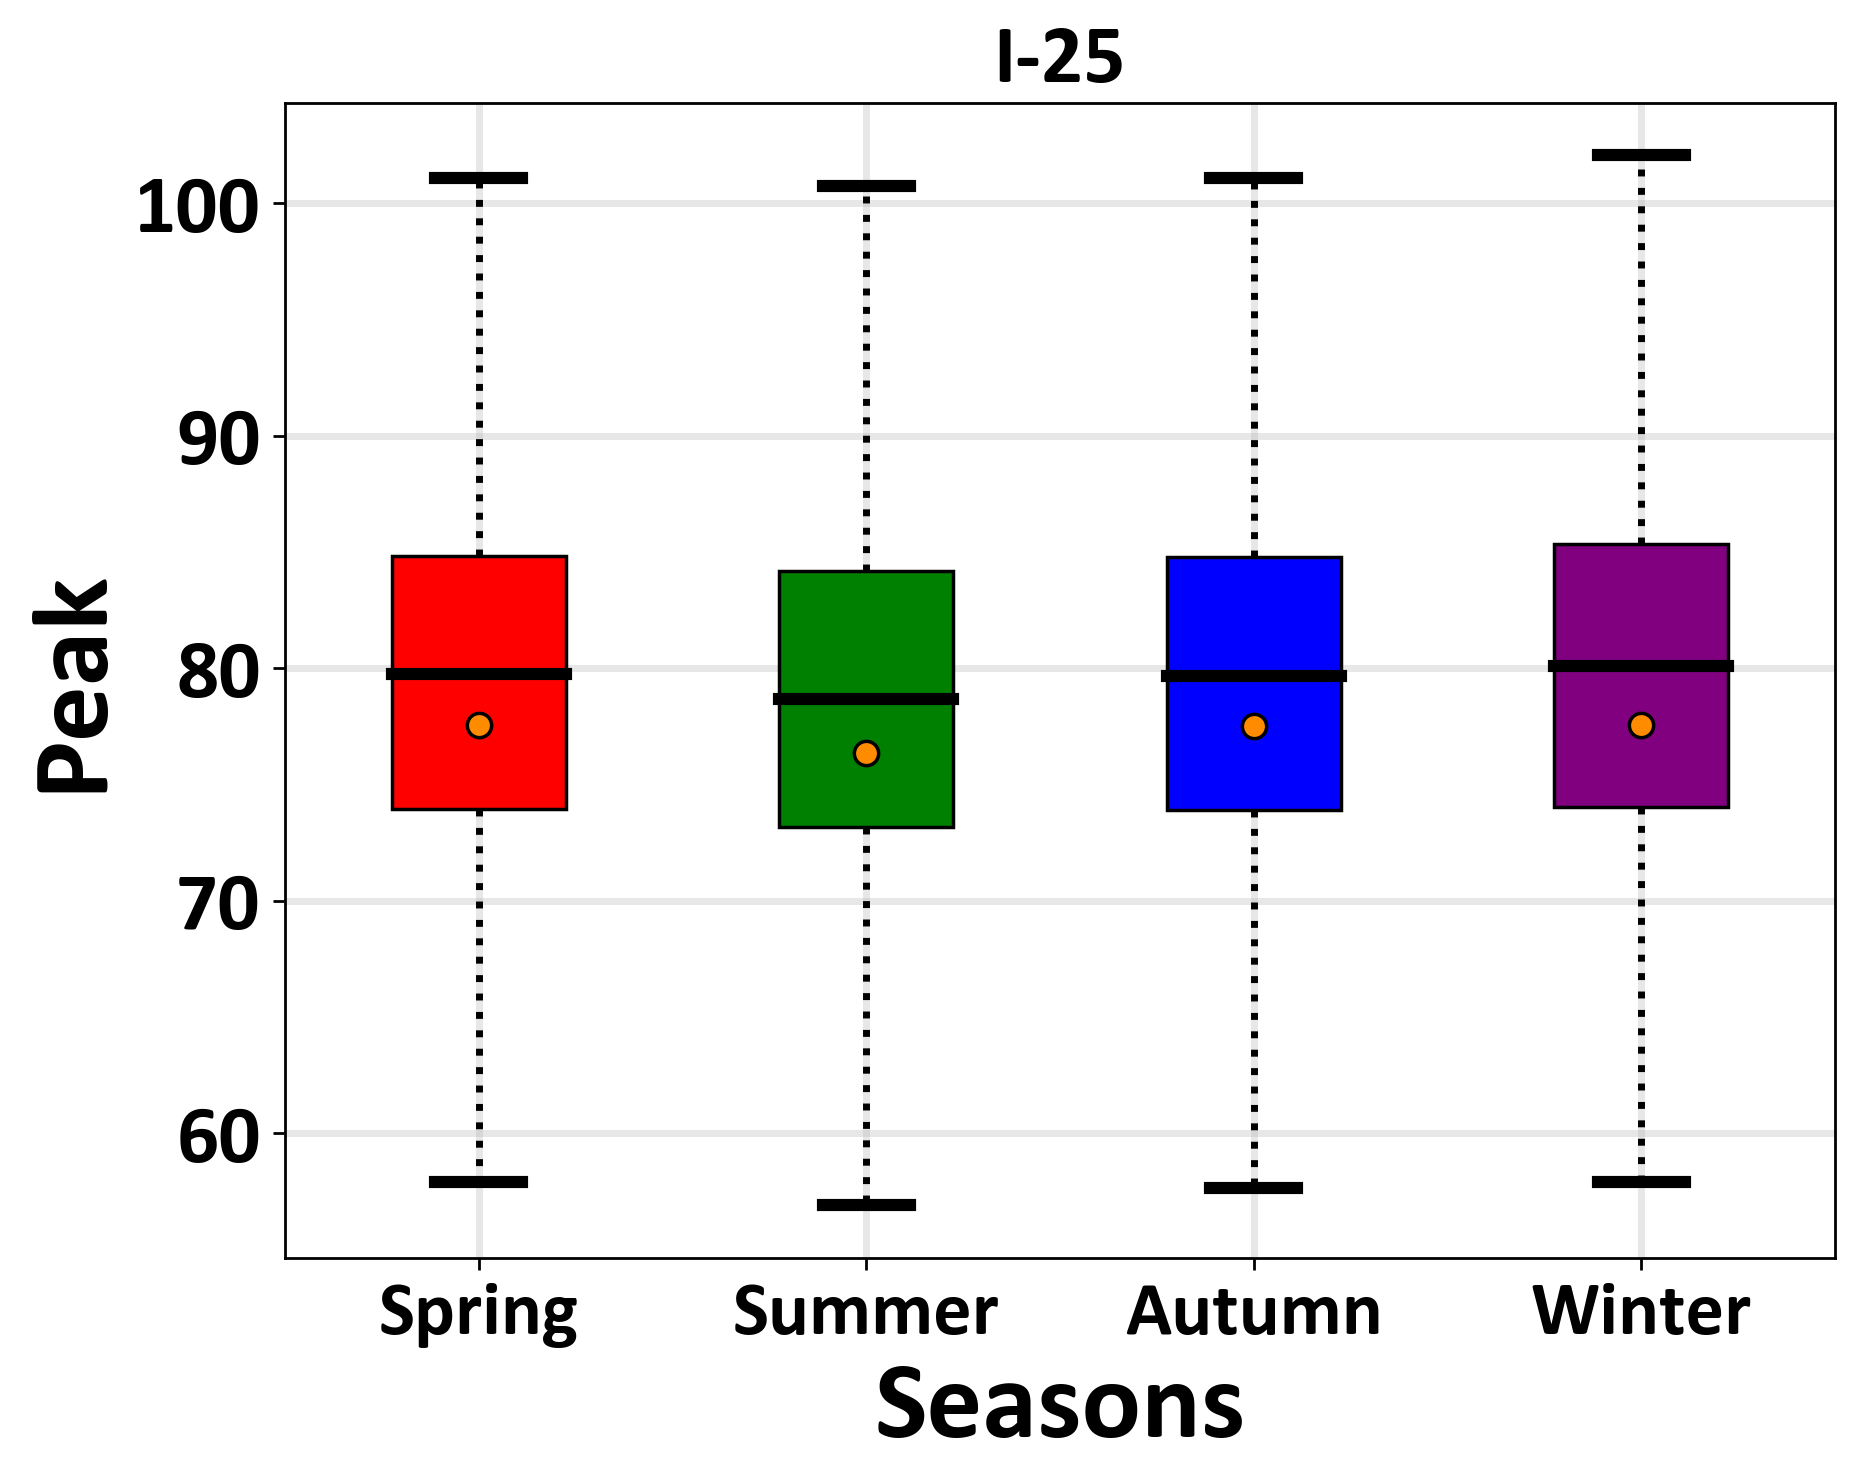

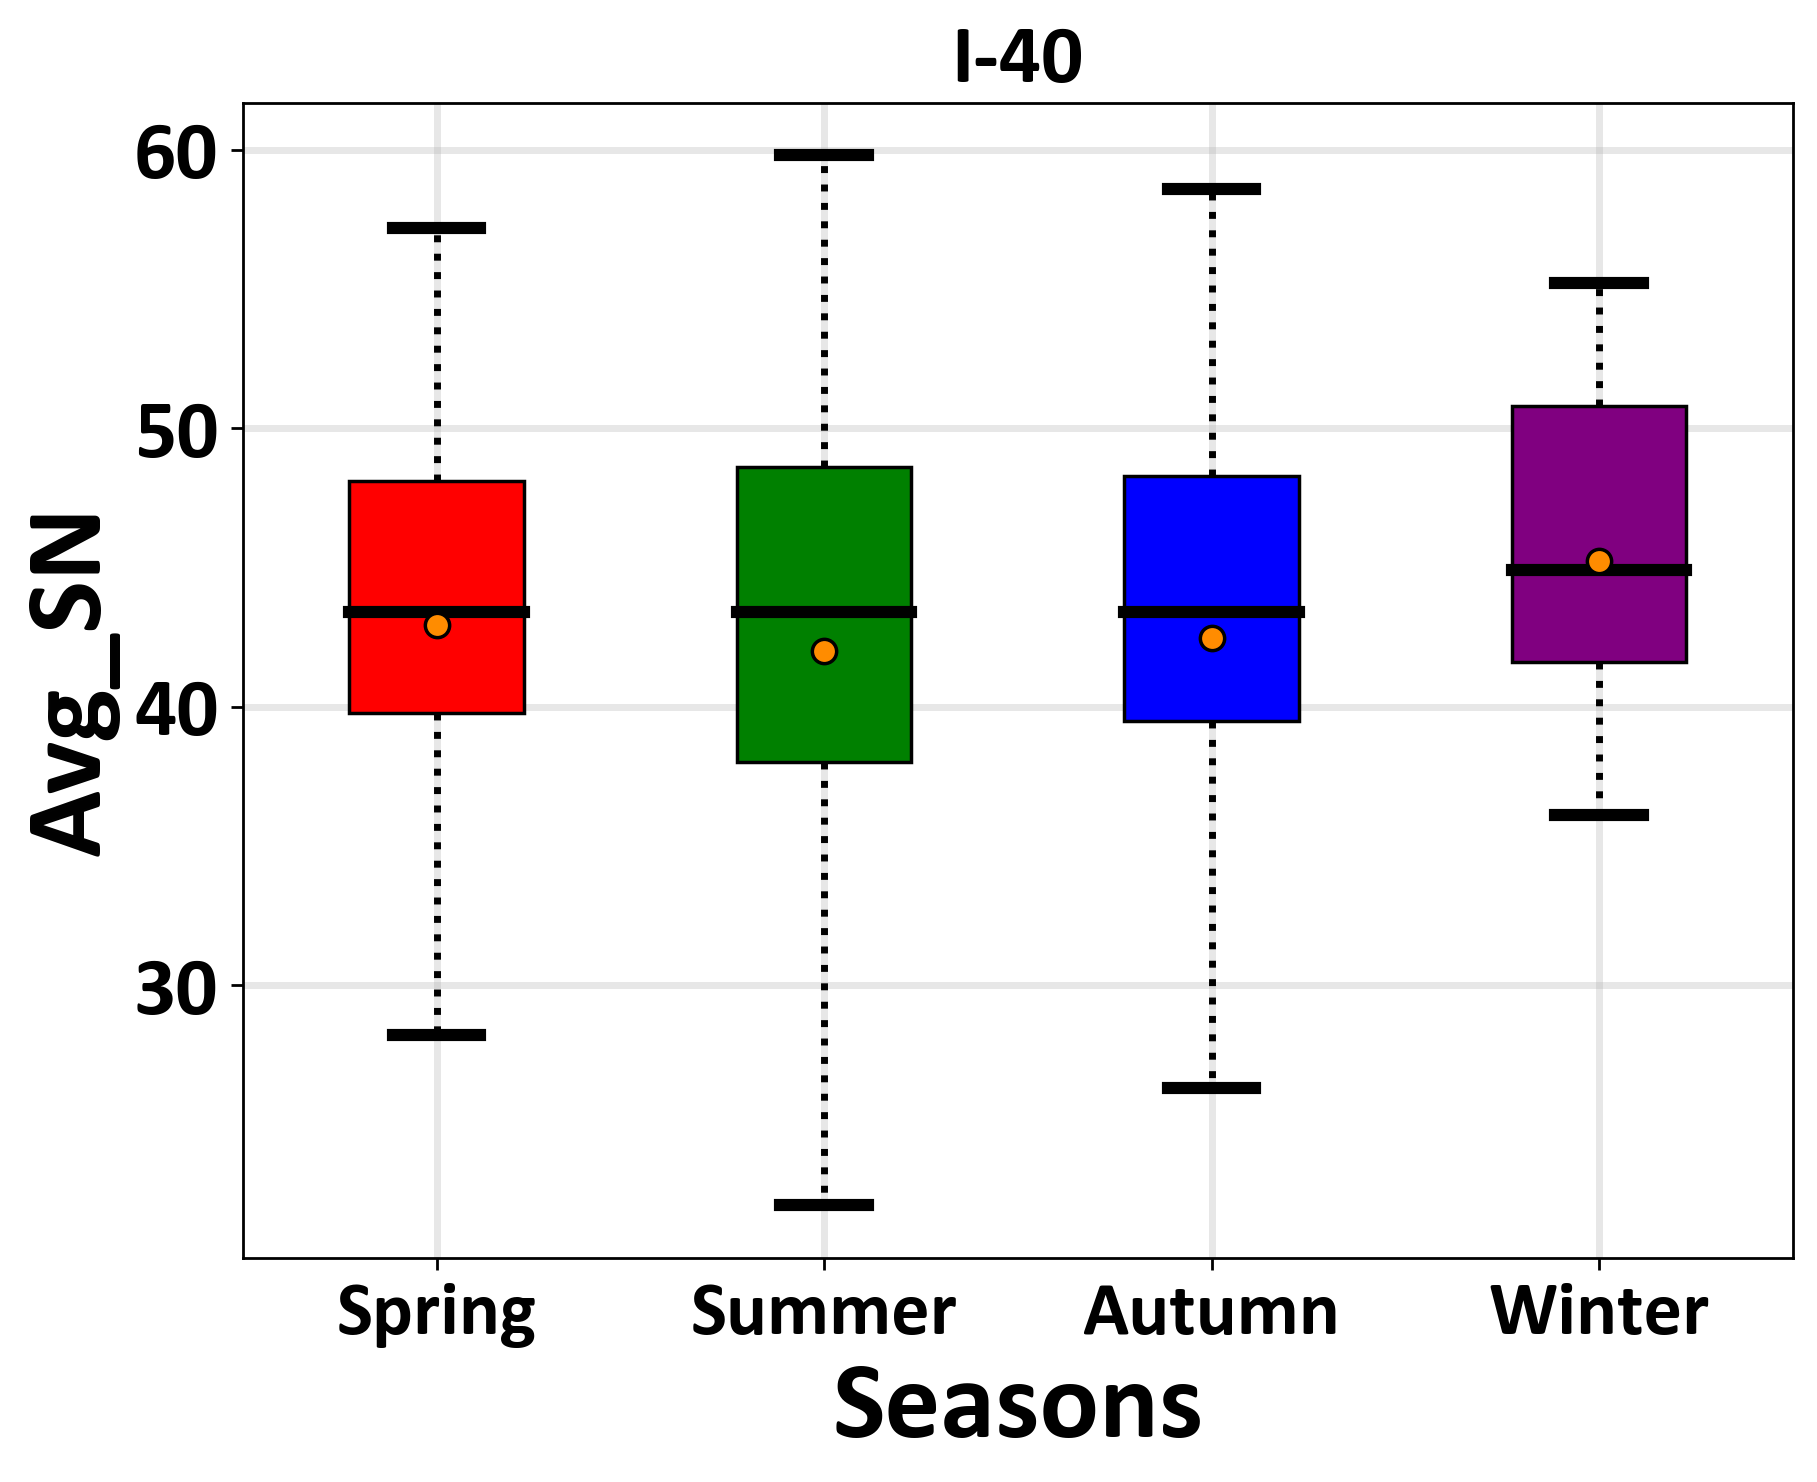

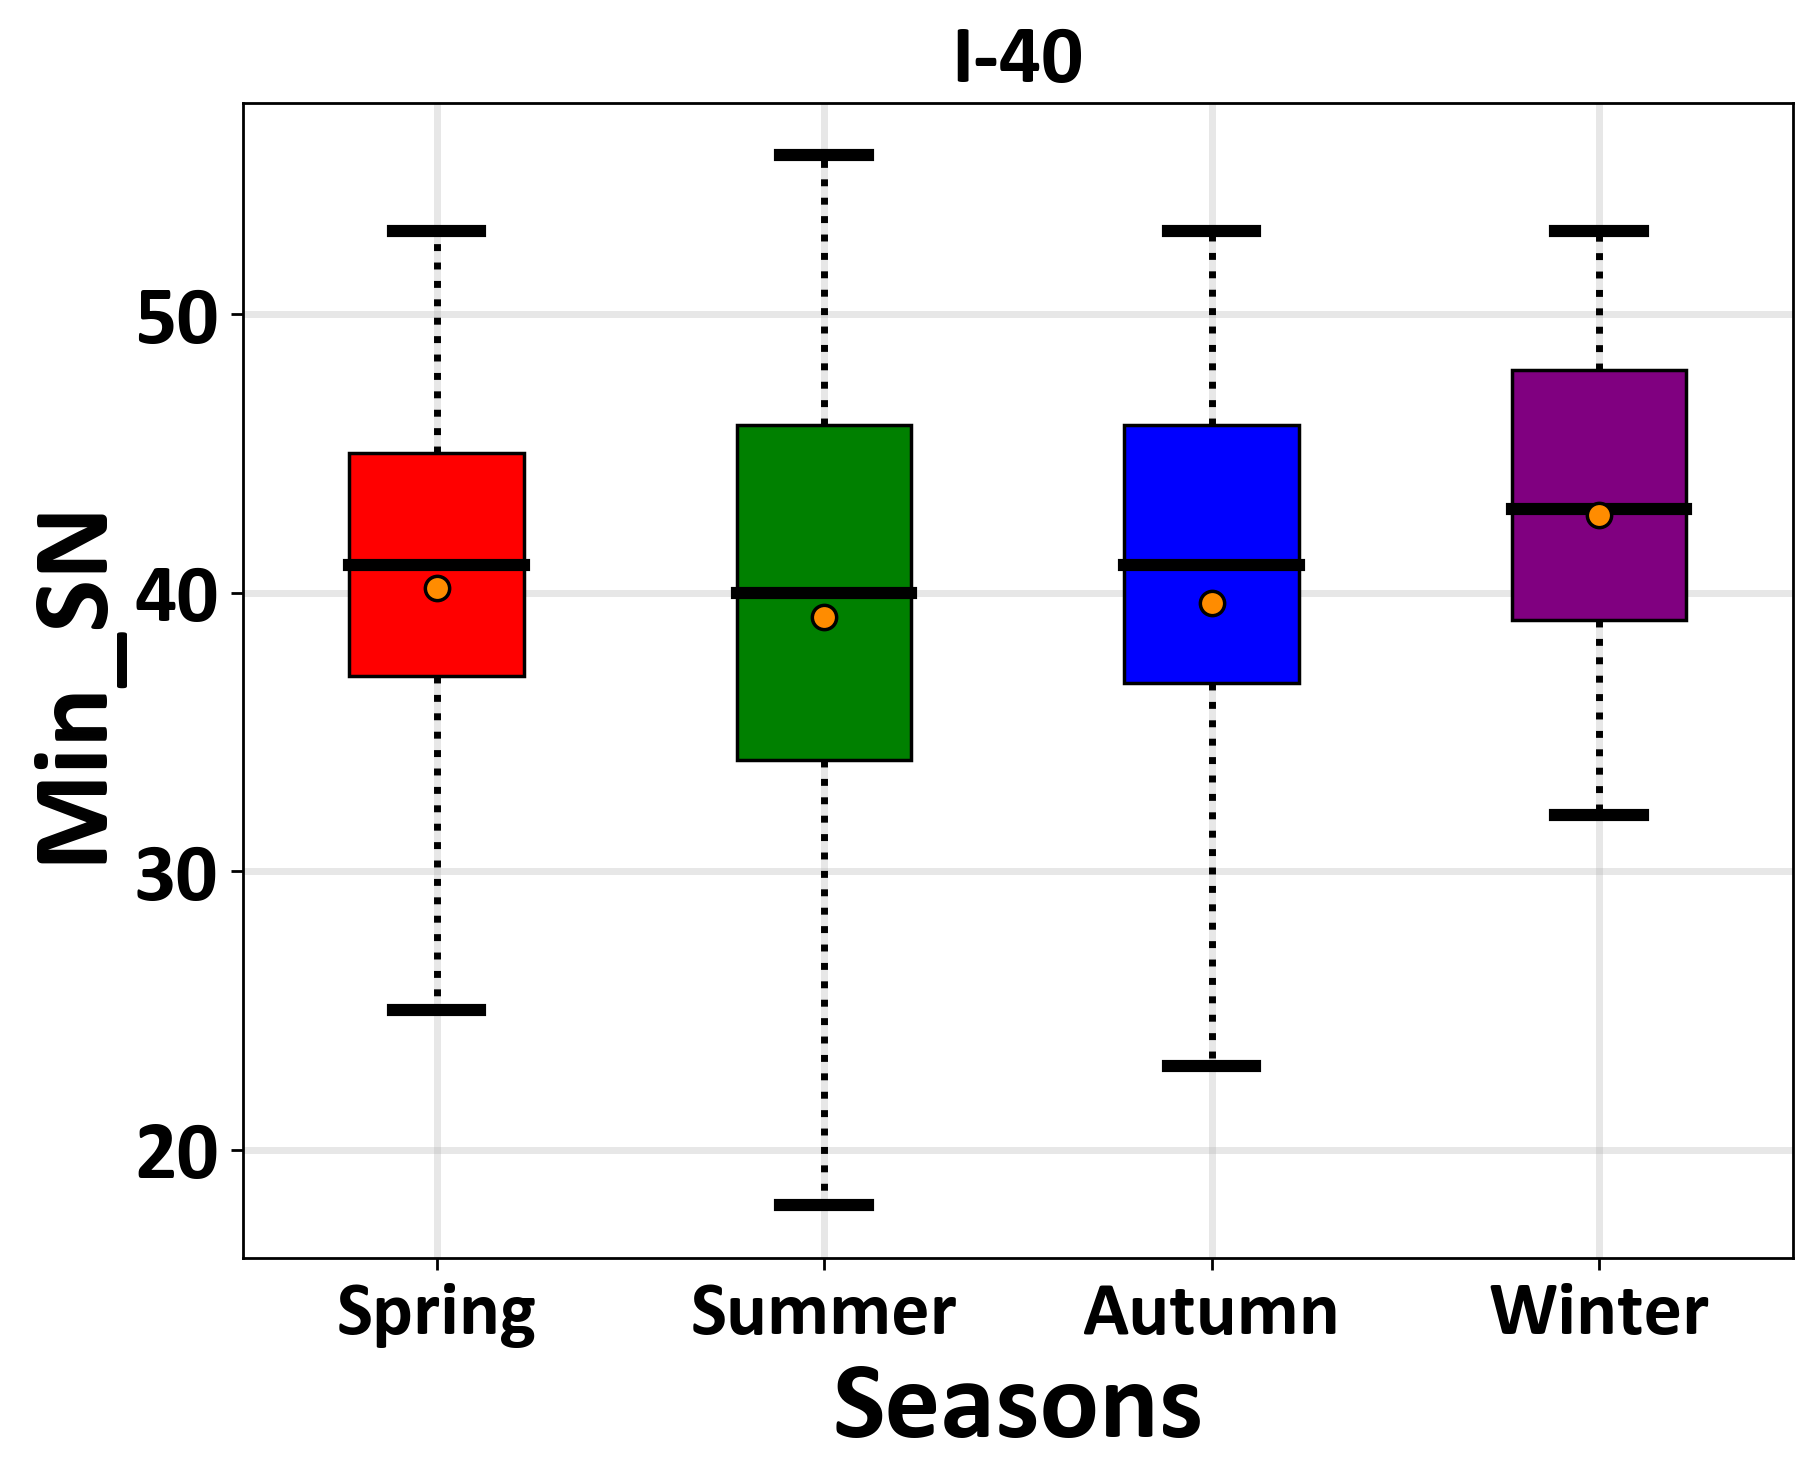

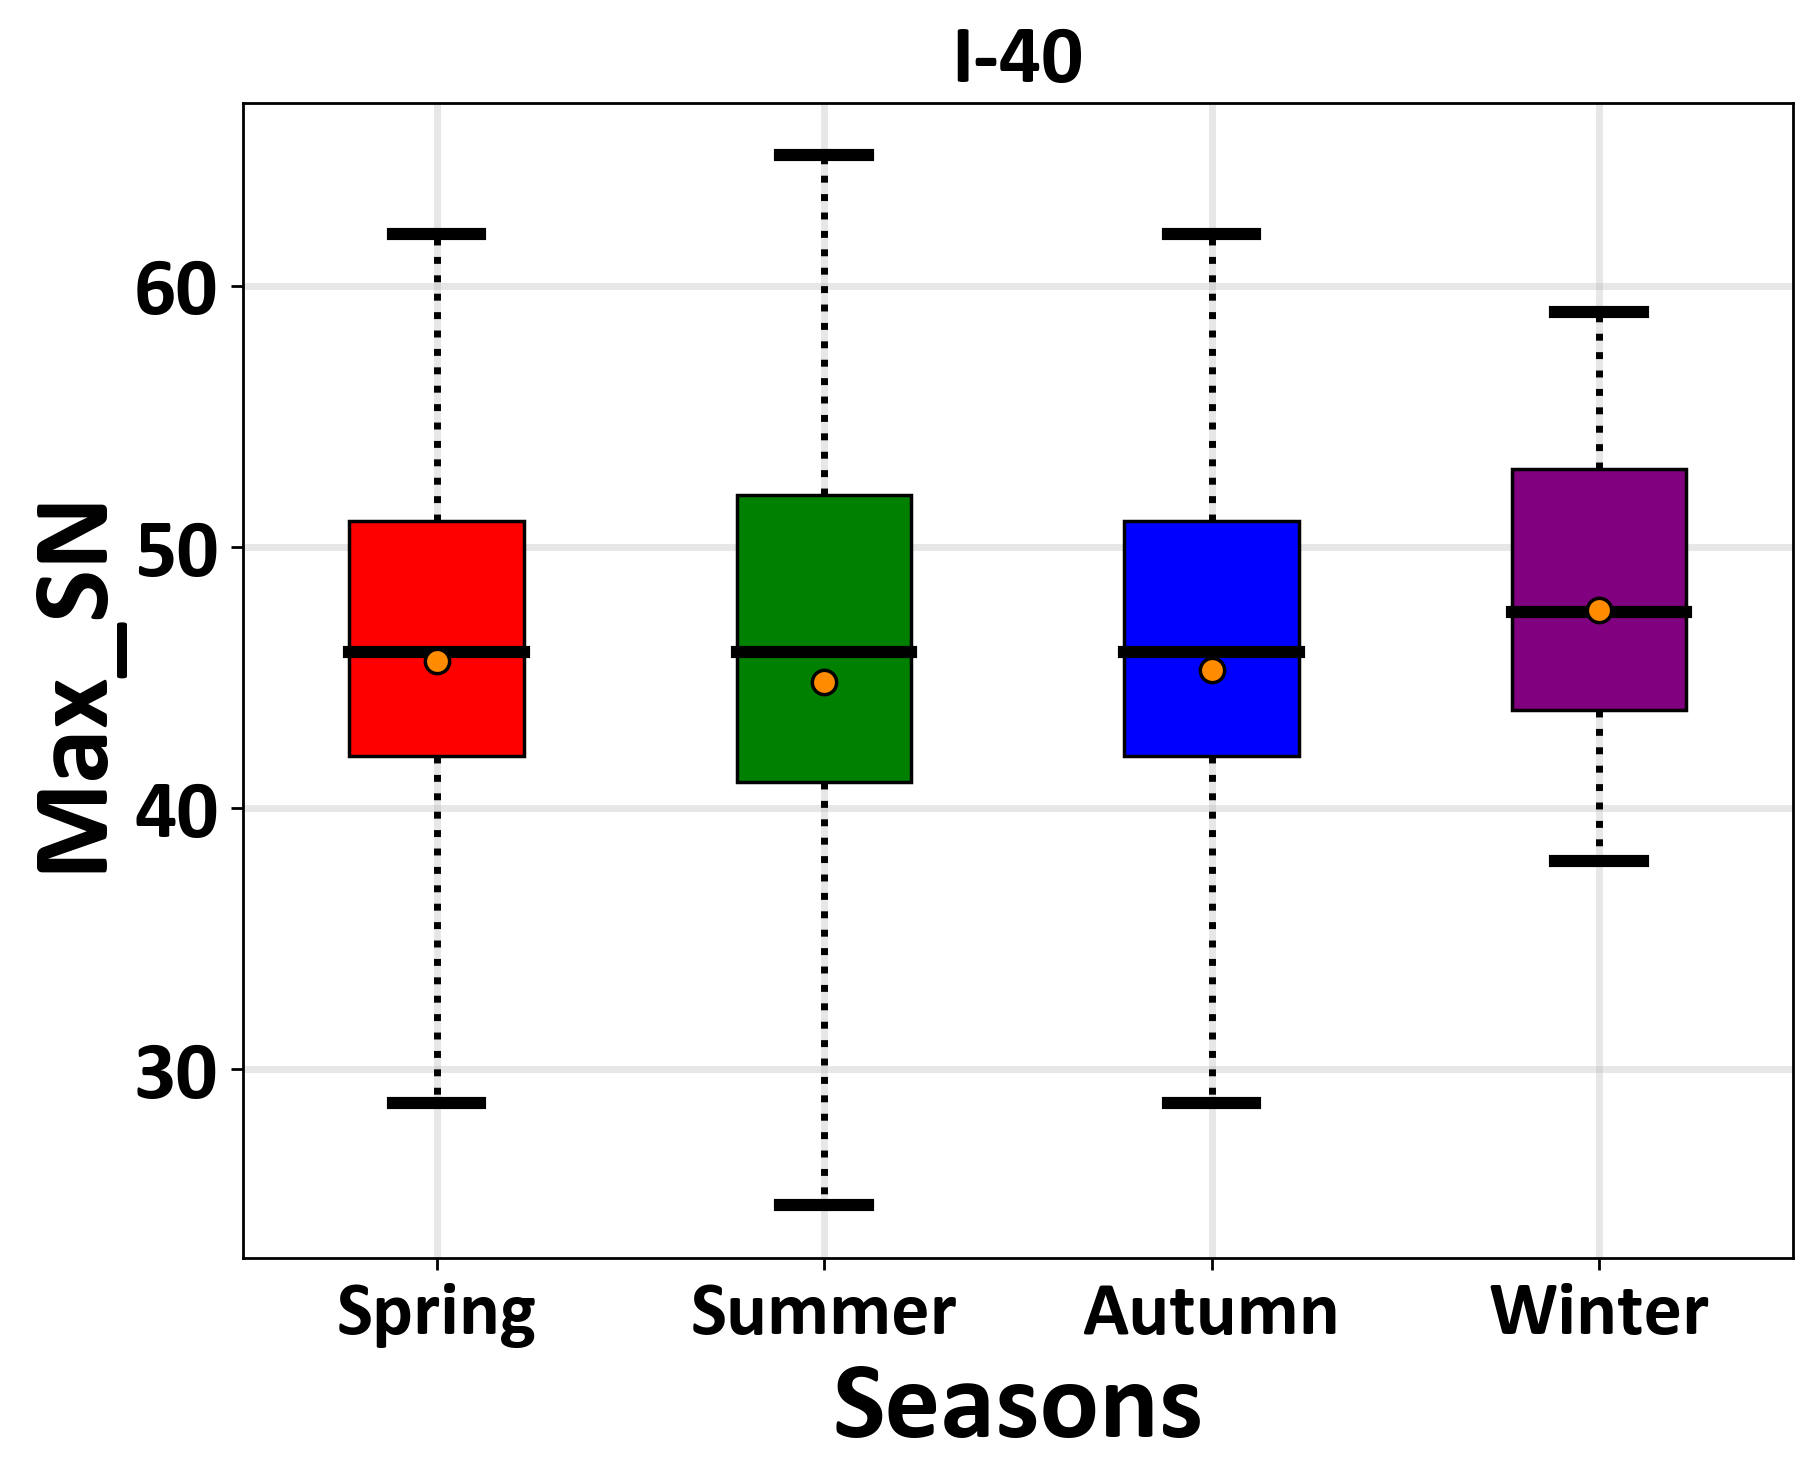

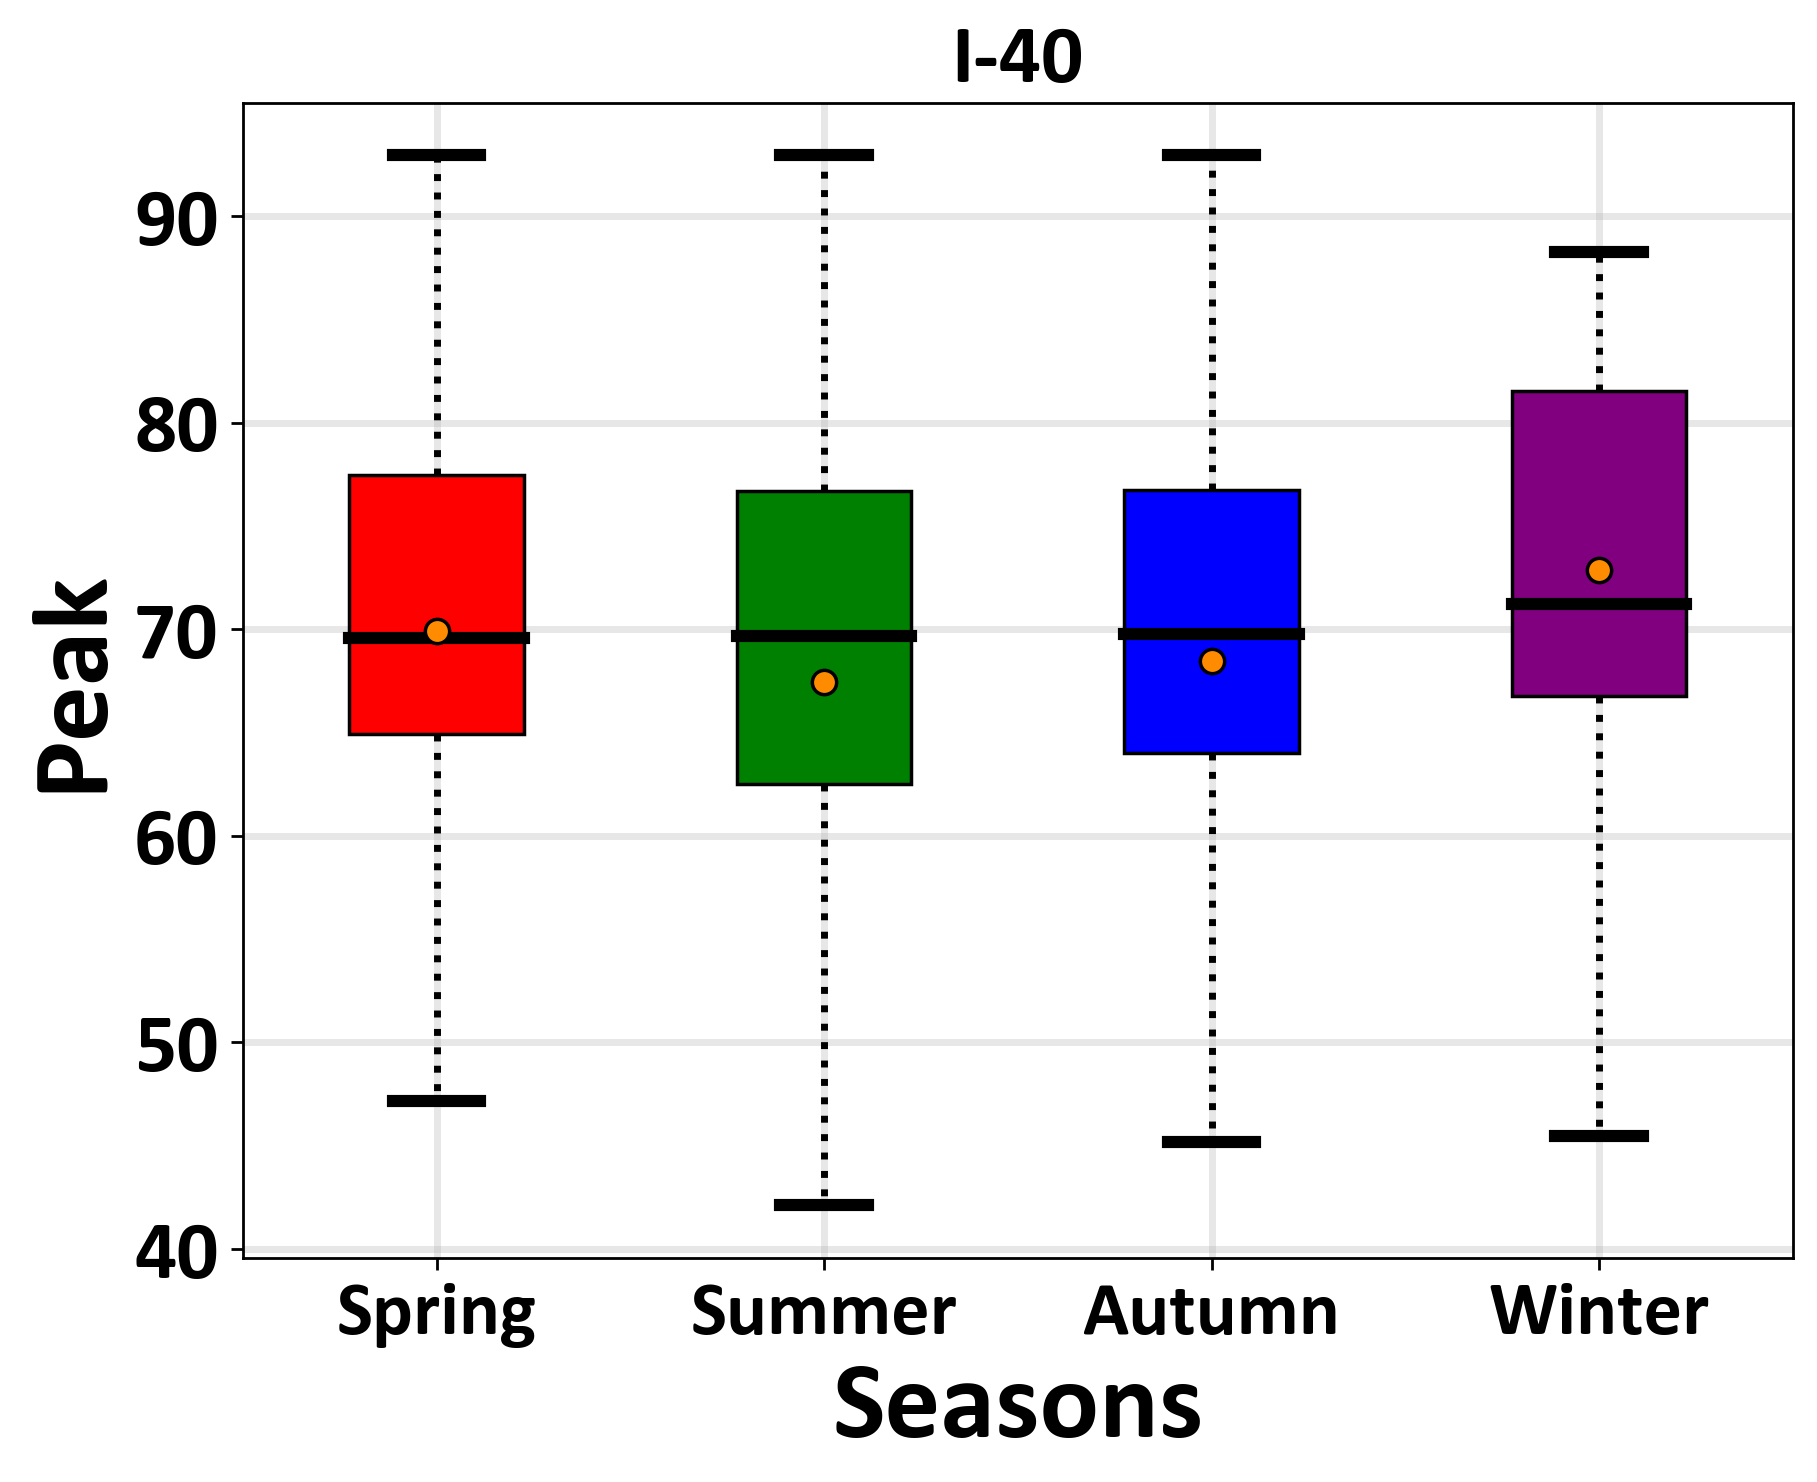

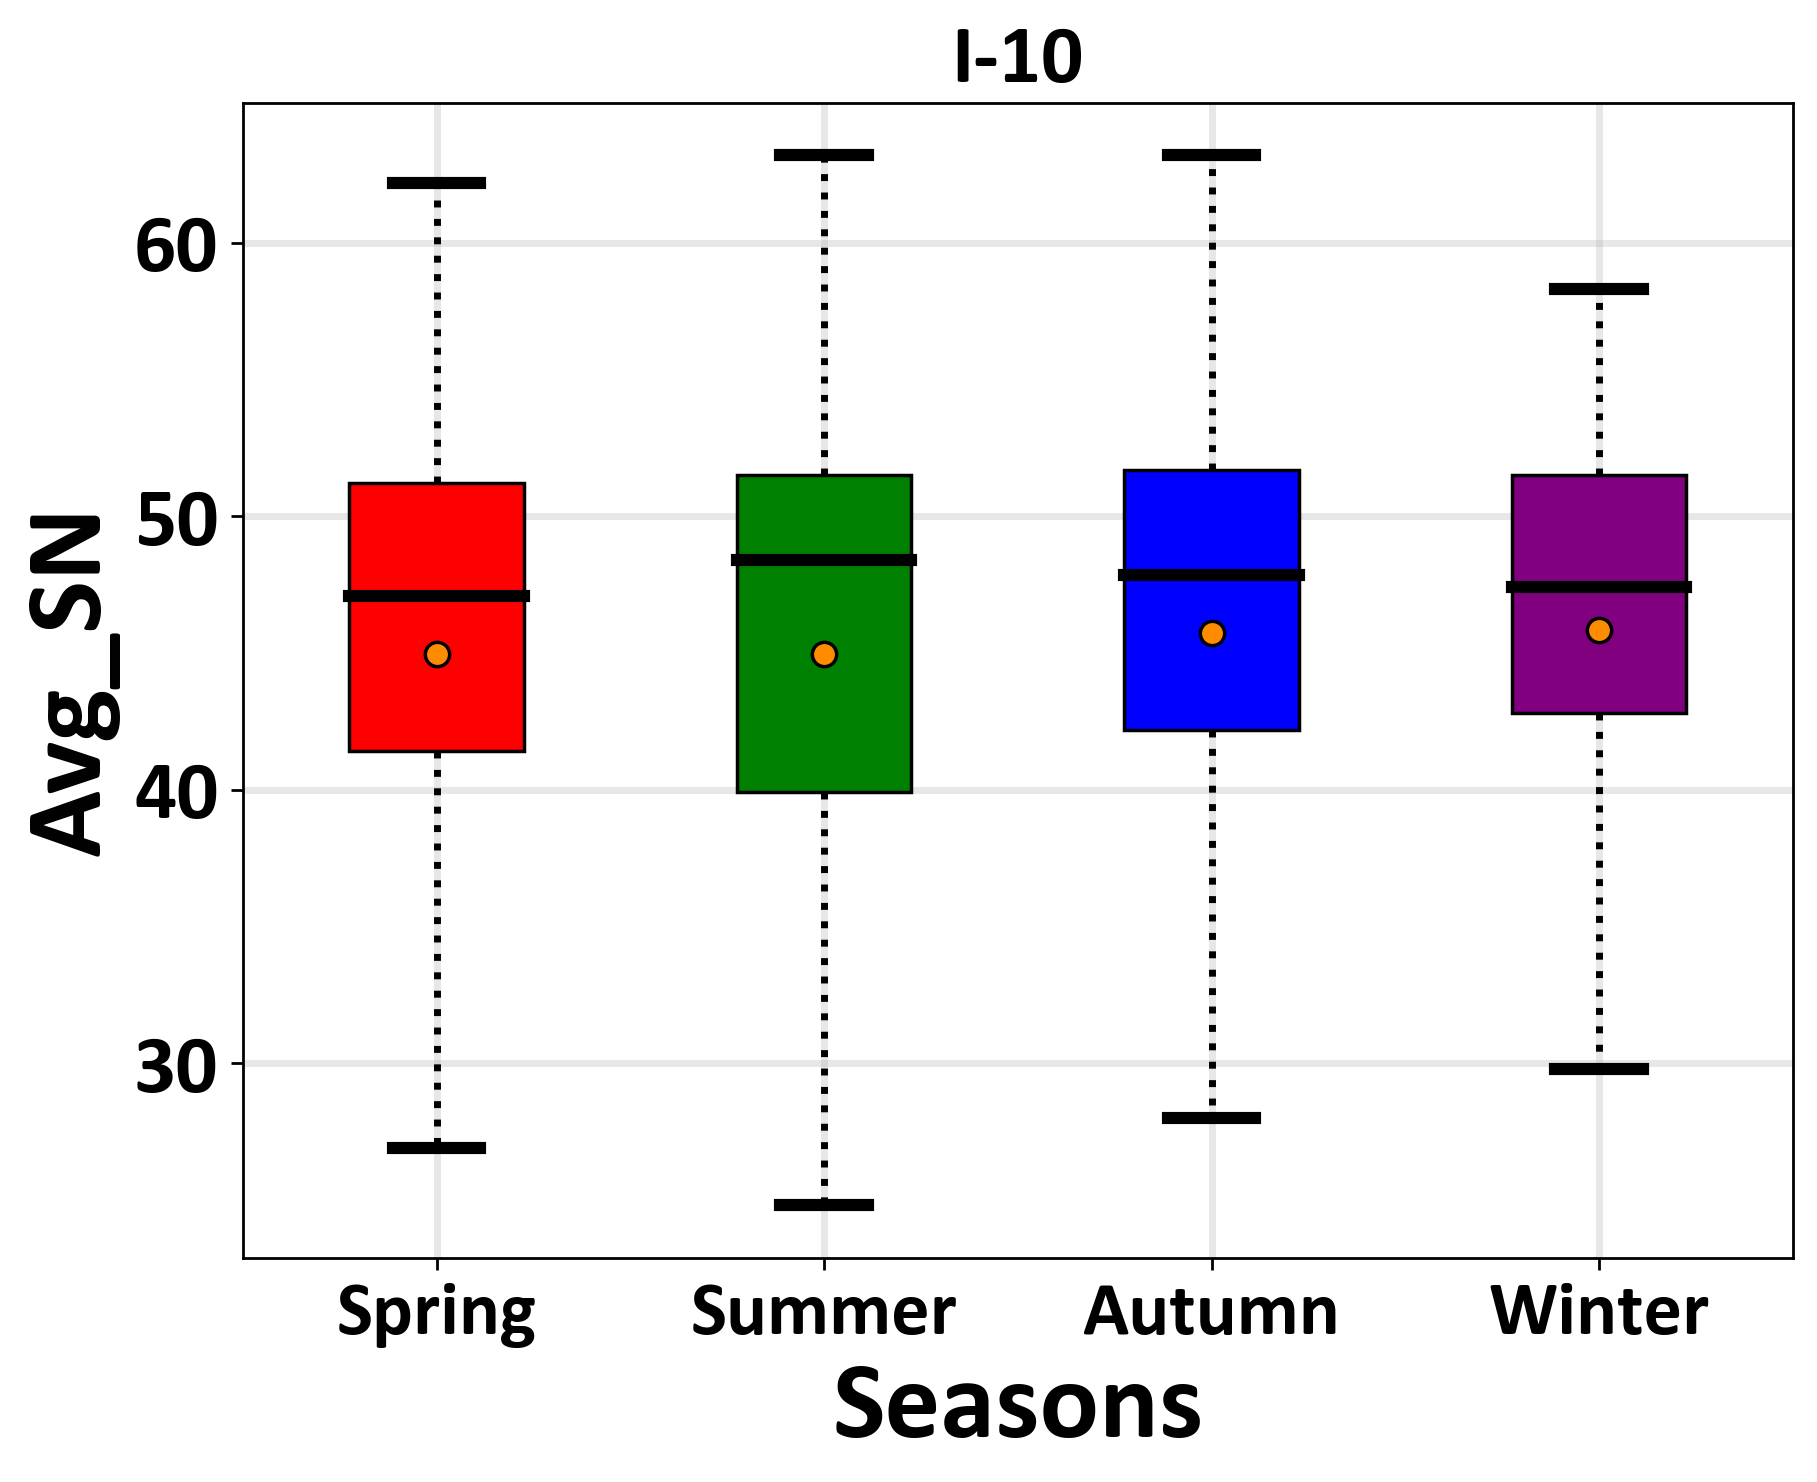

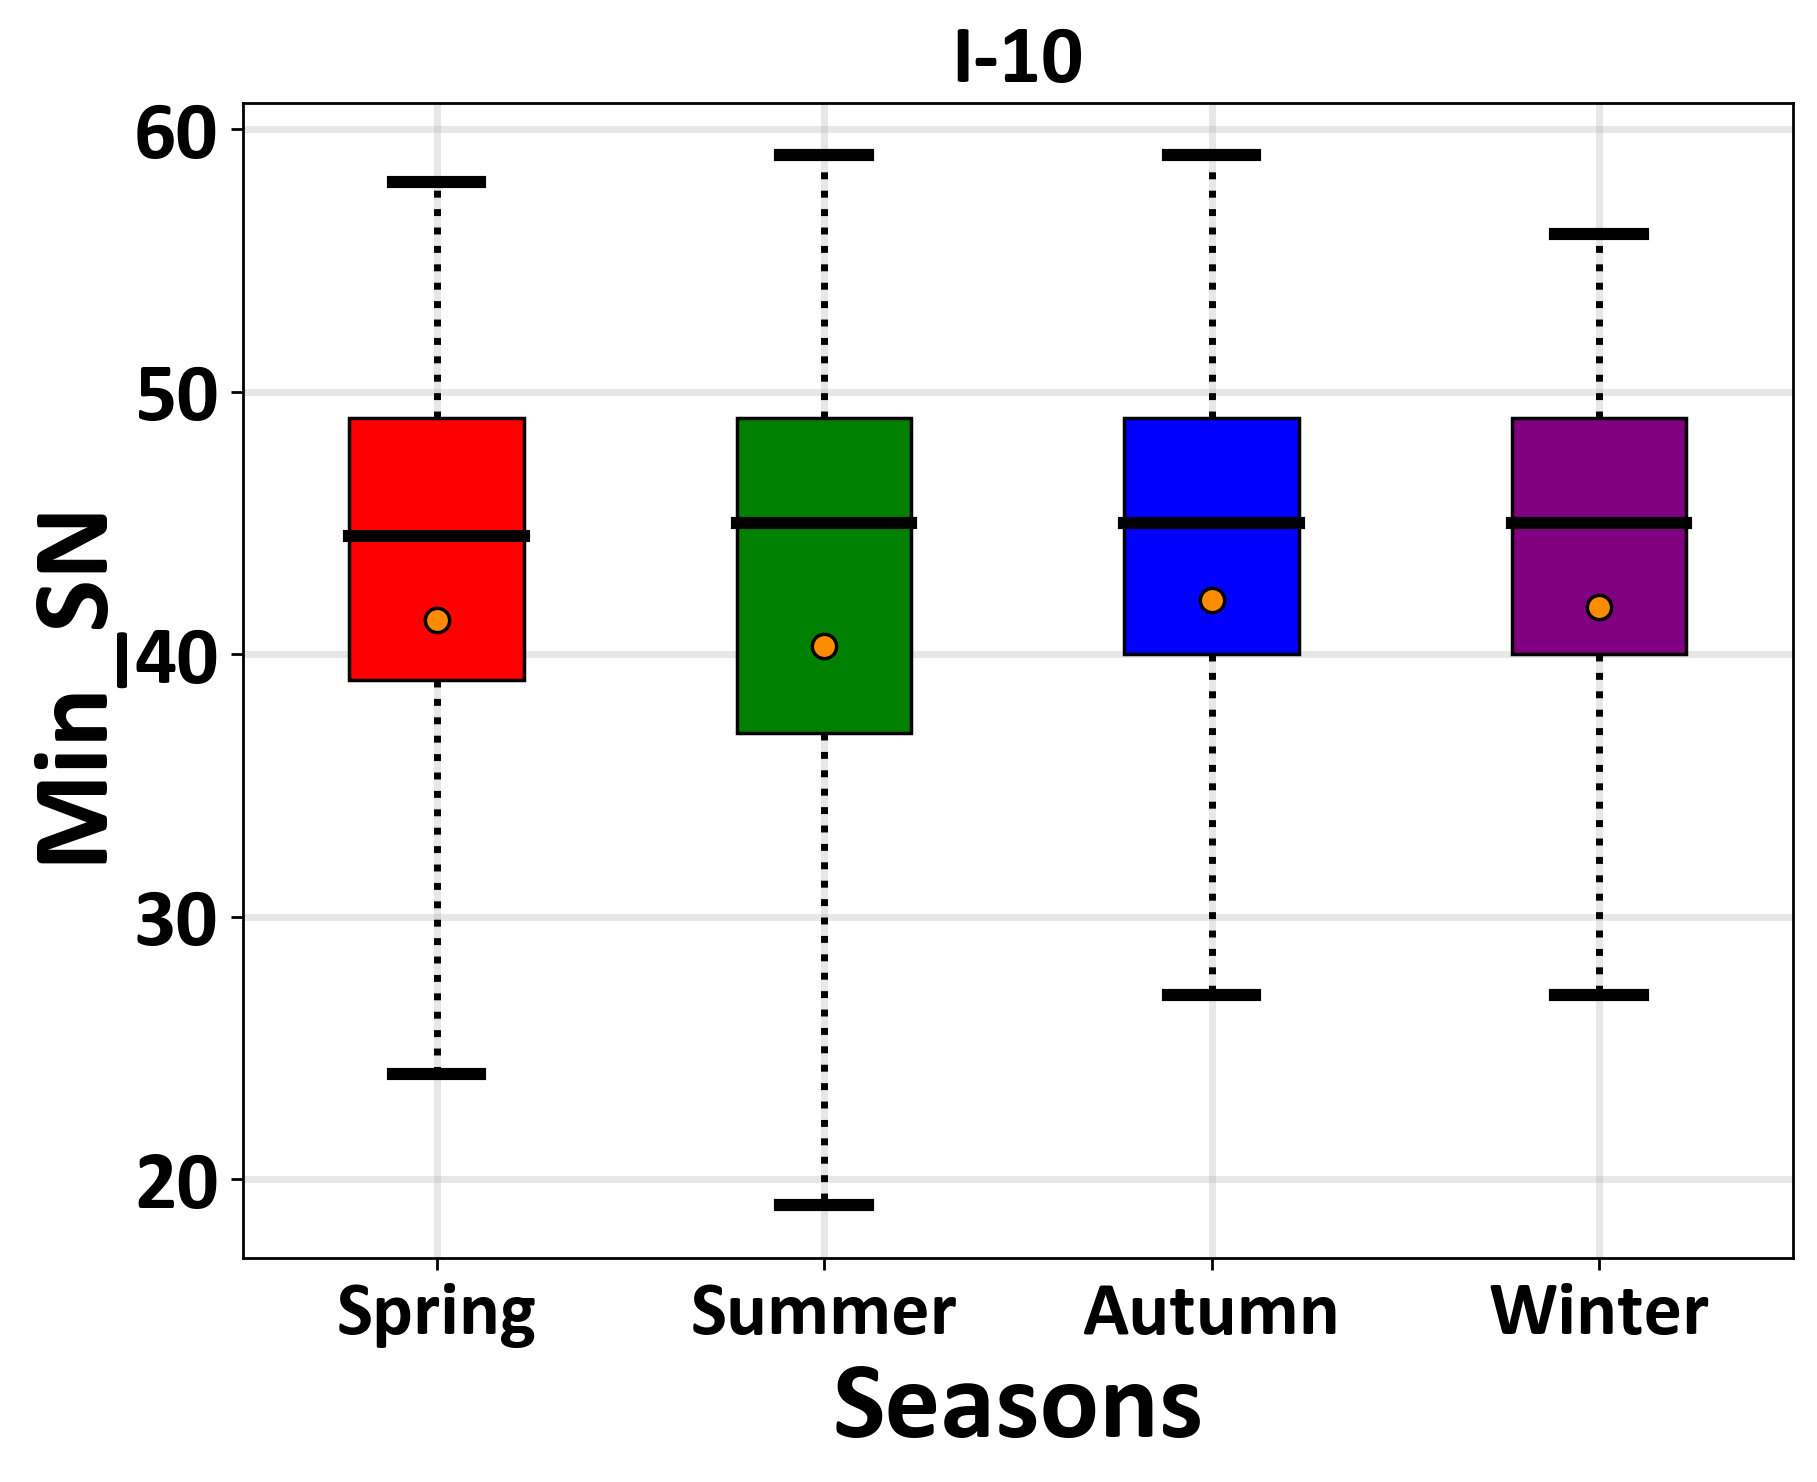

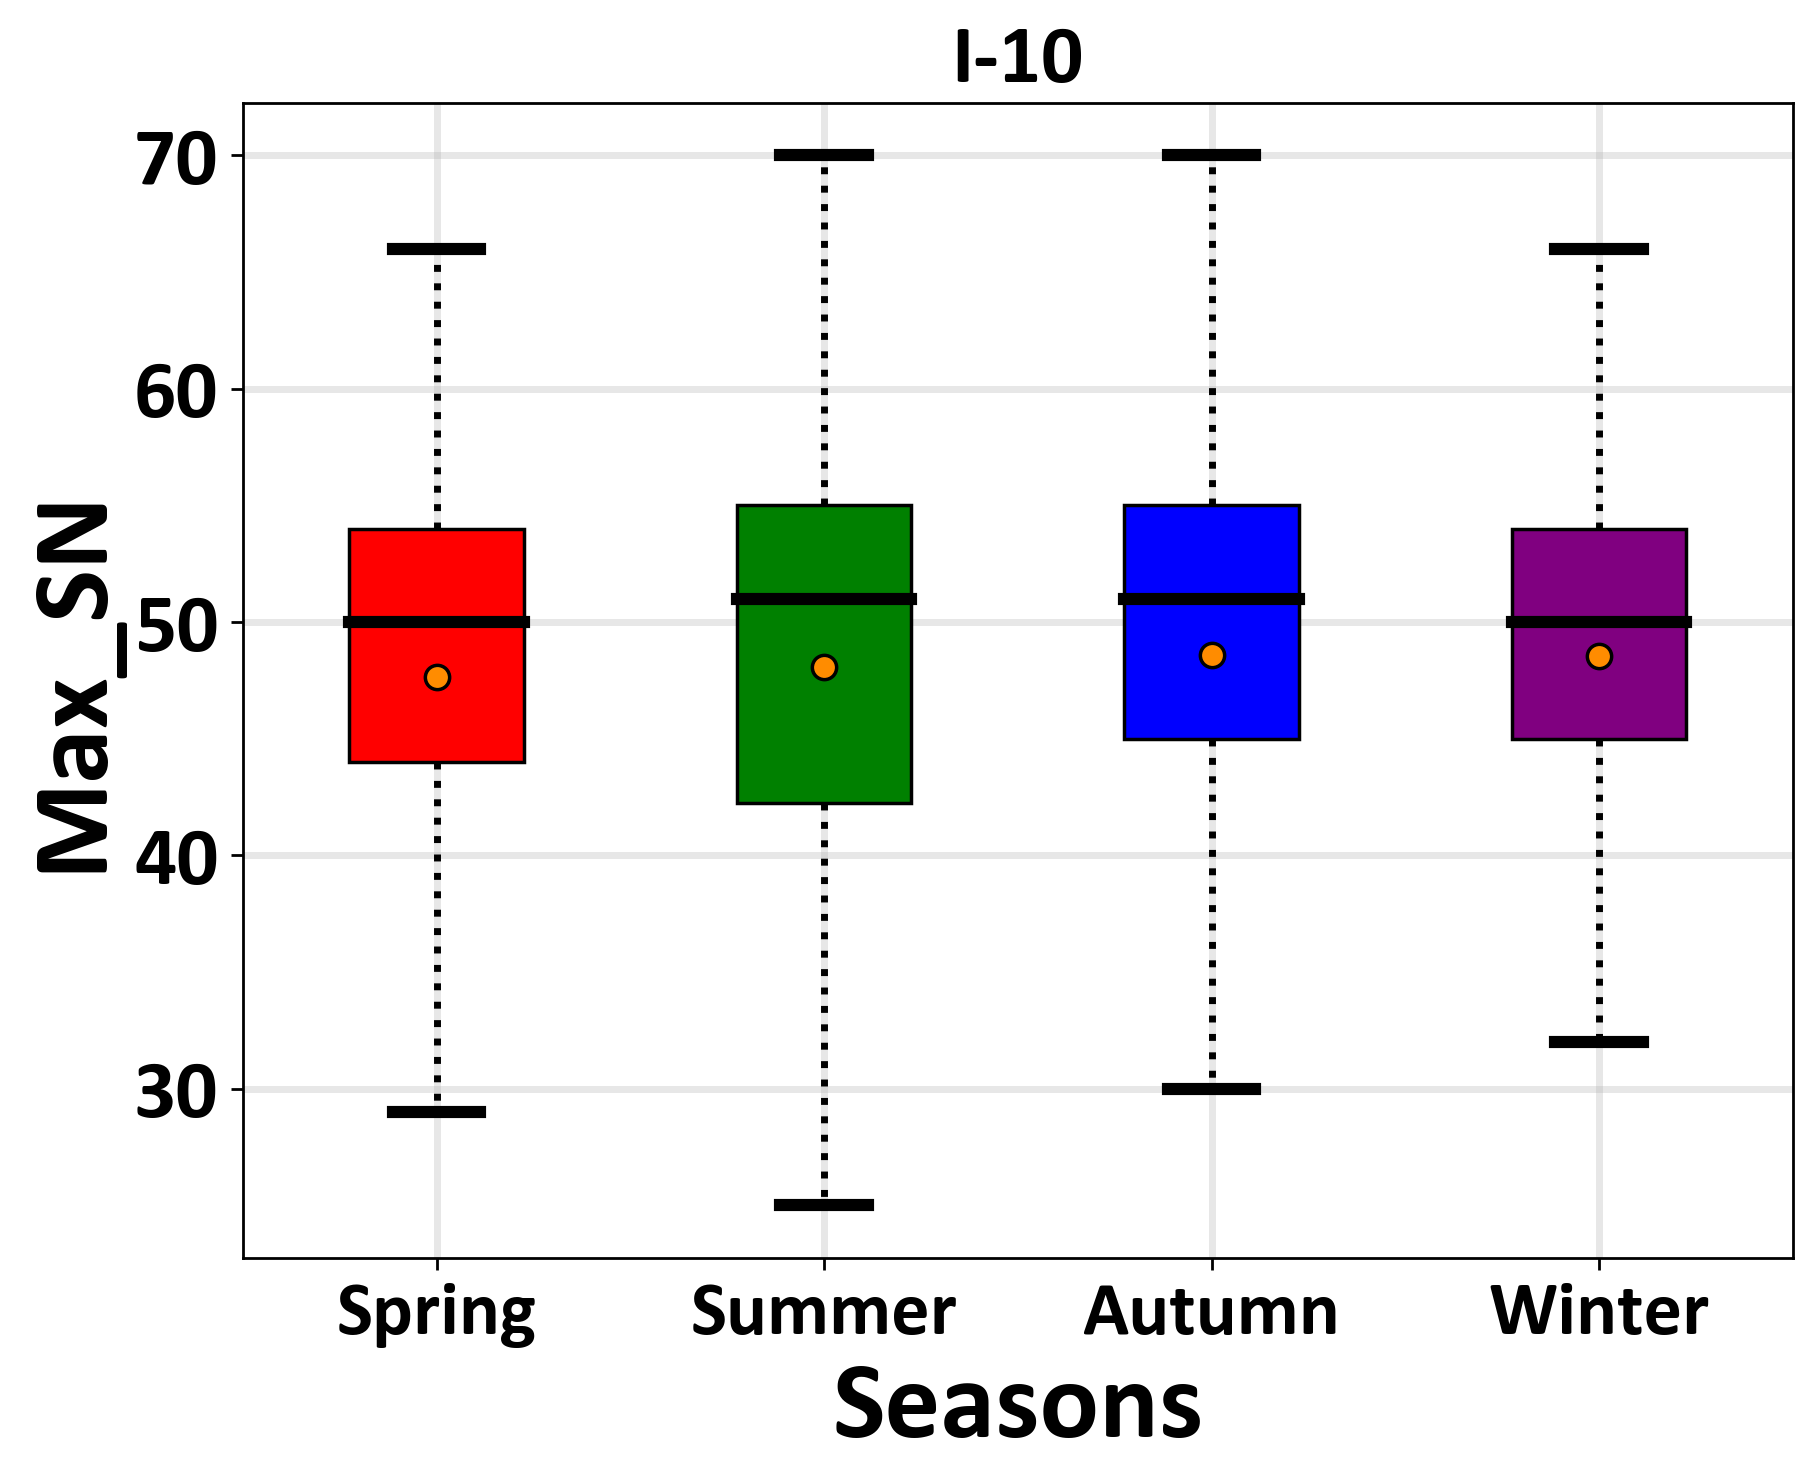

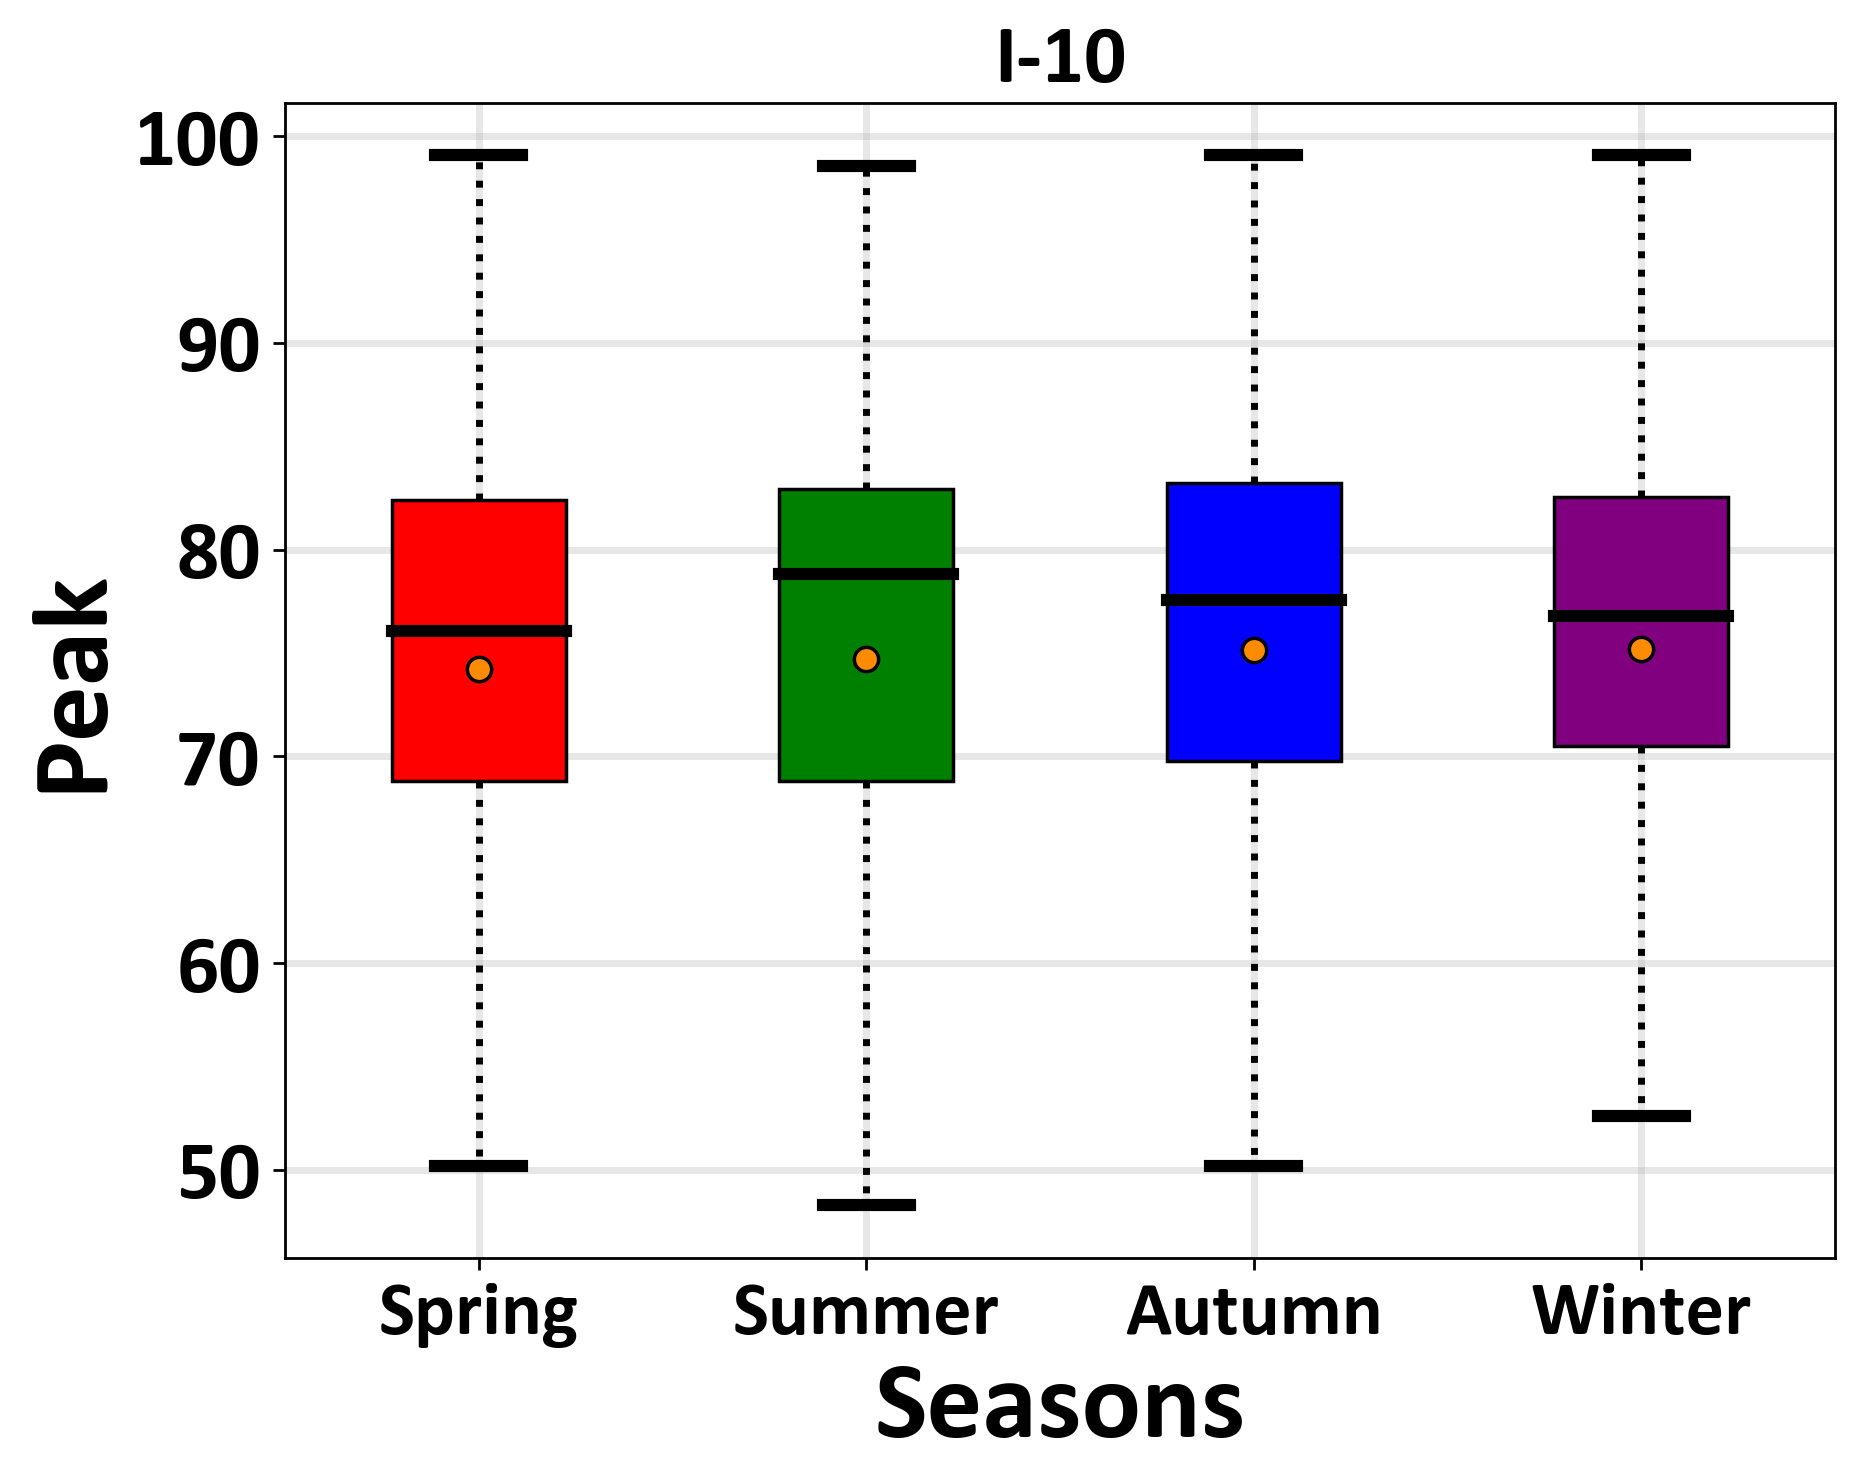

In [7]:
plot_type = 'box plots'
for idx, filename in enumerate(filenames):
    print('Generating', plot_type, 'plots for', filename, '...')
    data_dict = data_dict_list[idx]
    for data_type in data_types:
        data = []
        for season in seasons:
            data.append(data_dict[season][data_type])
        fig, ax = plt.subplots(figsize =(8, 6), dpi = 250)
        ax.set_axisbelow(True)
        ax.grid(linestyle='-', linewidth=2, alpha = 0.3)
        meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='darkorange', markersize = 7)
        # Creating plot
        bp = ax.boxplot(data, notch = False, showmeans = True, meanprops=meanpointprops, showfliers=False, patch_artist = True)
        ax.set_xlabel('Seasons', fontsize = 32)
        ax.set_xticklabels(seasons, fontsize = 22)
        ax.set_ylabel(str(data_type), fontsize = 32)
        colors = ['red', 'green', 'blue', 'purple']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        # changing color and linewidth of whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='black',
                        linewidth = 2.0,
                        linestyle =":")
        # changing color and linewidth of caps
        for cap in bp['caps']:
            cap.set(color ='black',
                    linewidth = 3.5)
        # changing color and linewidth of medians
        for median in bp['medians']:
            median.set(color ='black',
                       linewidth = 3.5)
        ax.set_title(filename[:-5], loc='center', pad=None)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.png', format='png', bbox_inches='tight', dpi=720)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.eps', format='eps', bbox_inches='tight', dpi=720)
#         plt.savefig(root_path + filename[:-5] + '/' + plot_type + '/' + data_type + '.pdf', format='pdf', bbox_inches='tight', dpi=720)
    print('Generating', plot_type, 'plots for', filename, ': complete.')